In [144]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.inspection import permutation_importance
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix
from scipy.stats import mode
from sklearn.decomposition import PCA

In [145]:
reservations = pd.read_csv('./data/reservations.csv')
reservations.head()

year   month    status status_date  number  day_of_month  \
0  2015  August  Canceled  2014-10-17      33            13   
1  2015    July  Canceled  2014-10-17      28             9   
2  2015    July  Canceled  2014-10-17      28             9   
3  2015    July  Canceled  2014-10-17      28             9   
4  2015    July  Canceled  2014-10-17      28             9   

   reservation_days_advance room_type  weekend_nights  week_nights  ...  \
0                       300         A               0            2  ...   
1                       265         A               0            2  ...   
2                       265         A               0            2  ...   
3                       265         A               0            2  ...   
4                       265         A               0            2  ...   

   entreprise  waiting_list          segment average_rate num_vehicles  \
0         NaN             0  Transient-Party         62.8            0   
1         NaN             0  Transient-Party         62.8            0   
2         NaN             0  Transient-Party         62.8            0   
3         NaN             0  Transient-Party         62.8            0   
4         NaN             0  Transient-Party         62.8            0   

  num_cancellations  num_bookings_not_canceled special_requests  \
0                 1                          0                0   
1                 1                          0                0   
2                 1                          0                0   
3                 1                          0                0   
4                 1                          0                0   

   total_length_of_stay total_spending  
0                     0              0  
1                     0              0  
2                     0              0  
3                     0              0  
4                     0              0  

[5 rows x 31 columns]

In [146]:
reservations.shape
#79390 rows, 31 columns

(79390, 31)

In [147]:
reservations.dtypes

year                           int64
month                         object
status                        object
status_date                   object
number                         int64
day_of_month                   int64
reservation_days_advance       int64
room_type                     object
weekend_nights                 int64
week_nights                    int64
num_adults                     int64
num_children                 float64
num_babies                     int64
meal                          object
name_hotel                    object
CRM                           object
returning                      int64
room_assigned                 object
reservation_changes            int64
deposit                       object
operator                     float64
entreprise                   float64
waiting_list                   int64
segment                       object
average_rate                 float64
num_vehicles                   int64
num_cancellations              int64
n

In [148]:
reservations.describe()

year        number  day_of_month  reservation_days_advance  \
count  79390.000000  79390.000000  79390.000000              79390.000000   
mean    2015.761784     30.334538     15.750661                107.863371   
std        0.509083     13.272608      8.786656                111.159098   
min     2015.000000      1.000000      1.000000                  0.000000   
25%     2015.000000     20.000000      8.000000                 18.000000   
50%     2016.000000     33.000000     16.000000                 70.000000   
75%     2016.000000     41.000000     23.000000                168.000000   
max     2017.000000     53.000000     31.000000                737.000000   

       weekend_nights   week_nights    num_adults  num_children    num_babies  \
count    79390.000000  79390.000000  79390.000000  79386.000000  79390.000000   
mean         0.906852      2.464227      1.849225      0.092094      0.008351   
std          0.997056      1.885558      0.613342      0.377013      0.102708   
min          0.000000      0.000000      0.000000      0.000000      0.000000   
25%          0.000000      1.000000      2.000000      0.000000      0.000000   
50%          1.000000      2.000000      2.000000      0.000000      0.000000   
75%          2.000000      3.000000      2.000000      0.000000      0.000000   
max         19.000000     50.000000     55.000000     10.000000     10.000000   

          returning  ...      operator   entreprise  waiting_list  \
count  79390.000000  ...  68780.000000  4346.000000  79390.000000   
mean       0.028190  ...     81.438587   161.209158      3.378070   
std        0.165516  ...    104.901383   112.172729     21.264941   
min        0.000000  ...      1.000000     6.000000      0.000000   
25%        0.000000  ...      9.000000    46.000000      0.000000   
50%        0.000000  ...     13.000000   153.000000      0.000000   
75%        0.000000  ...    187.000000   223.000000      0.000000   
max        1.000000  ...    481.000000   487.000000    391.000000   

       average_rate  num_vehicles  num_cancellations  \
count  79390.000000  79390.000000       79390.000000   
mean      95.537943      0.062917           0.124197   
std       47.812391      0.243748           1.023803   
min        0.000000      0.000000           0.000000   
25%       65.000000      0.000000           0.000000   
50%       89.550000      0.000000           0.000000   
75%      117.797500      0.000000           0.000000   
max     5400.000000      3.000000          26.000000   

       num_bookings_not_canceled  special_requests  total_length_of_stay  \
count               79390.000000      79390.000000          79390.000000   
mean                    0.107671          0.501826              2.026817   
std                     1.242978          0.750646              2.572277   
min                     0.000000          0.000000              0.000000   
25%                     0.000000          0.000000              0.000000   
50%                     0.000000          0.000000              1.000000   
75%                     0.000000          1.000000              3.000000   
max                    54.000000          5.000000             69.000000   

       total_spending  
count    79390.000000  
mean       231.245018  
std        308.535028  
min          0.000000  
25%          0.000000  
50%        126.000000  
75%        365.000000  
max       7592.000000  

[8 rows x 21 columns]

In [149]:
reservations.describe(include='object') #object types

month     status status_date room_type   meal  name_hotel  \
count     79390      79390       79390     79390  79390       79390   
unique       12          3         647        10      5           2   
top     October  Check-Out  2015-10-21         A     BB  City Hotel   
freq      11160      48079        1461     59215  62515       52806   

              CRM room_assigned     deposit    segment  
count       79390         79390       79390      79390  
unique          8            12           3          4  
top     Online TA             A  No Deposit  Transient  
freq        34072         50269       67456      56865

In [150]:
for object in reservations.describe(include='object'):
    print(reservations[object].value_counts())

#two different hotels: City Hotel and Resort Hotel


month
October      11160
September    10508
August        9039
July          7648
November      6782
May           6135
April         5945
June          5595
March         5118
December      4395
February      4165
January       2900
Name: count, dtype: int64
status
Check-Out    48079
Canceled     30474
No-Show        837
Name: count, dtype: int64
status_date
2015-10-21    1461
2015-07-06     805
2016-11-25     790
2015-01-01     763
2016-01-18     625
              ... 
2015-02-24       1
2015-02-26       1
2015-02-27       1
2015-03-05       1
2015-03-10       1
Name: count, Length: 647, dtype: int64
room_type
A    59215
D    11574
E     3784
F     1759
G     1264
B      942
C      447
H      393
L        6
P        6
Name: count, dtype: int64
meal
BB           62515
HB           10018
SC            5518
FB             698
Undefined      641
Name: count, dtype: int64
name_hotel
City Hotel      52806
Resort Hotel    26584
Name: count, dtype: int64
CRM
Online TA        34072
Offline TA

In [151]:
reservations.isna().sum()

def prepare_target_var(df):
    df = df.copy()
    df['target_binary'] = df['status'].map(
        {'Canceled': 1, 'Check-Out': 0, 'No-Show':0}
    )
    
    return df

In [152]:
reservations = prepare_target_var(reservations)
reservations.drop(['entreprise', 'operator'], axis=1, inplace=True)

In [153]:
reservations['has_deposit'] = reservations['deposit'].map({'No Deposit': 0, 'Non Refund': 1, 'Refundable': 1})
reservations['family_booking'] = (reservations['num_children'] + reservations['num_babies']) > 0

print(reservations.isna().sum())

def convert_month(month_str):
    month_map = {
        'January': 1, 'February': 2, 'March': 3, 'April': 4,
        'May': 5, 'June': 6, 'July': 7, 'August': 8,
        'September': 9, 'October': 10, 'November': 11, 'December': 12
    }
    return month_map.get(month_str)  

reservations['month'] = reservations['month'].astype(str).apply(convert_month)
reservations = reservations.rename(columns={'day_of_month':'day'})
reservations['reservation_date'] = pd.to_datetime(reservations[['year', 'month', 'day']])
reservations['reservation_done_date'] = reservations['reservation_date'] - pd.to_timedelta(reservations['reservation_days_advance'], unit='D')

# relative_price: average rate compare to mean rate for same room type
reservations['reservations_season'] = pd.cut(reservations['month'], 
                               bins=[0,3,6,9,12], 
                               labels=['Winter', 'Spring', 'Summer', 'Fall'])

reservations['relative_price'] = (
    reservations['average_rate'] / 
    reservations.groupby('room_type')['average_rate'].transform('mean')
)

reservations['got_reserved_room'] = (reservations['room_type'] == reservations['room_assigned']).astype(int)

reservations.head()

year                         0
month                        0
status                       0
status_date                  0
number                       0
day_of_month                 0
reservation_days_advance     0
room_type                    0
weekend_nights               0
week_nights                  0
num_adults                   0
num_children                 4
num_babies                   0
meal                         0
name_hotel                   0
CRM                          0
returning                    0
room_assigned                0
reservation_changes          0
deposit                      0
waiting_list                 0
segment                      0
average_rate                 0
num_vehicles                 0
num_cancellations            0
num_bookings_not_canceled    0
special_requests             0
total_length_of_stay         0
total_spending               0
target_binary                0
has_deposit                  0
family_booking               0
dtype: i

year  month    status status_date  number  day  reservation_days_advance  \
0  2015      8  Canceled  2014-10-17      33   13                       300   
1  2015      7  Canceled  2014-10-17      28    9                       265   
2  2015      7  Canceled  2014-10-17      28    9                       265   
3  2015      7  Canceled  2014-10-17      28    9                       265   
4  2015      7  Canceled  2014-10-17      28    9                       265   

  room_type  weekend_nights  week_nights  ...  total_length_of_stay  \
0         A               0            2  ...                     0   
1         A               0            2  ...                     0   
2         A               0            2  ...                     0   
3         A               0            2  ...                     0   
4         A               0            2  ...                     0   

   total_spending  target_binary has_deposit family_booking reservation_date  \
0               0              1           0          False       2015-08-13   
1               0              1           0          False       2015-07-09   
2               0              1           0          False       2015-07-09   
3               0              1           0          False       2015-07-09   
4               0              1           0          False       2015-07-09   

   reservation_done_date reservations_season  relative_price got_reserved_room  
0             2014-10-17              Summer         0.72348                 1  
1             2014-10-17              Summer         0.72348                 1  
2             2014-10-17              Summer         0.72348                 1  
3             2014-10-17              Summer         0.72348                 1  
4             2014-10-17              Summer         0.72348                 1  

[5 rows x 37 columns]

In [154]:
city_hotel = reservations[reservations['name_hotel']=='City Hotel']
resort_hotel = reservations[reservations['name_hotel']=='Resort Hotel']

In [155]:
def analyze_hotel_distributions(df):
    """
    Analyze distributions of variables across hotels to determine if separate analysis for each hotel is needed.
    """
    # Separate numerical and categorical columns
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
    categorical_cols.remove('name_hotel')
    
    results = {
        'numerical_tests': {},
        'categorical_tests': {}
    }
    
    # Analyze numerical variables
    for col in numerical_cols:
        # Get data for each hotel
        city_data = df[df['name_hotel'] == 'City Hotel'][col].dropna()
        resort_data = df[df['name_hotel'] == 'Resort Hotel'][col].dropna()
        
        statistic, pvalue = stats.mannwhitneyu(
            city_data, 
            resort_data,
            alternative='two-sided'
        )
        
        # Effect size, we relate the mean differences between the data with the variability for both
        pooled_std = np.sqrt((city_data.var() + resort_data.var()) / 2)
        effect_size = abs(city_data.mean() - resort_data.mean()) / pooled_std
        
        # some basic statistics
        stats_summary = {
            'city_mean': city_data.mean(),
            'resort_mean': resort_data.mean(),
            'city_median': city_data.median(),
            'resort_median': resort_data.median(),
            'city_std': city_data.std(),
            'resort_std': resort_data.std()
        }
        
        results['numerical_tests'][col] = {
            'p_value': pvalue,
            'effect_size': effect_size,
            'significant_difference': pvalue < 0.05,
            'meaningful_difference': effect_size > 0.2,  # Common threshold for small effect
            'statistics': stats_summary
        }
    
    # for categorical
    for col in categorical_cols:
        # creates contingency table for an independence test
        contingency = pd.crosstab(df['name_hotel'], df[col])
        
        # as we learned in stats class, we used chi-square tests of independence
        chi2, pvalue, _, _ = stats.chi2_contingency(contingency)
        
        # how strong is the relationship? (sqrt(chi-squared/(n(k-1))
        n = contingency.sum().sum()
        min_dim = min(contingency.shape) - 1
        strength = np.sqrt(chi2 / (n * min_dim))
        
        # Distribution analysis
        props = pd.crosstab(df['name_hotel'], df[col], normalize='index')
        max_diff = (props.loc['City Hotel'] - props.loc['Resort Hotel']).abs().max()
        
        results['categorical_tests'][col] = {
            'p_value': pvalue,
            'effect_size': strength,
            'significant_difference': pvalue < 0.05,
            'meaningful_difference': strength > 0.1,  # Common threshold for Cramer's V
            'max_category_difference': max_diff,
            'distribution': props.to_dict()
        }
    
    # to create a summary DataFrame
    summary_data = []
    
    for var_type, tests in results.items():
        for variable, metrics in tests.items():
            summary_data.append({
                'Variable': variable,
                'Type': 'Numerical' if var_type == 'numerical_tests' else 'Categorical',
                'p_value': metrics['p_value'],
                'effect_size': metrics['effect_size'],
                'Significant': metrics['significant_difference'],
                'Meaningful': metrics['meaningful_difference']
            })
    
    summary_df = pd.DataFrame(summary_data)
    summary_df = summary_df.sort_values(
        ['Meaningful', 'Significant', 'effect_size'],
        ascending=[False, False, False]
    )
    
    return summary_df, results

In [156]:
def print_detailed_analysis(results, threshold_effect_size = 0.2):
    """
    Prints detailed analysis of differences between hotels.
    threshold_effect_size (float): Threshold for considering effect size meaningful. We just used the most commonly used.
    """
    print("\nVariables requiring separate analysis by hotel:")
    print("=============================================")
    
    # Analyze numerical variables
    significant_num = []
    for var, metrics in results['numerical_tests'].items():
        if metrics['meaningful_difference'] and metrics['significant_difference']:
            significant_num.append((var, metrics['effect_size']))
    
    if significant_num:
        print("\nNumerical variables:")
        for var, effect in sorted(significant_num, key=lambda x: x[1], reverse=True):
            stats = results['numerical_tests'][var]['statistics']
            print(f"\n{var} (effect size: {effect:.3f}):")
            print(f"  City Hotel: mean={stats['city_mean']:.2f}, median={stats['city_median']:.2f}")
            print(f"  Resort Hotel: mean={stats['resort_mean']:.2f}, median={stats['resort_median']:.2f}")
    
    # Analyze categorical variables
    significant_cat = []
    for var, metrics in results['categorical_tests'].items():
        if metrics['meaningful_difference'] and metrics['significant_difference']:
            significant_cat.append((var, metrics['effect_size']))
    
    if significant_cat:
        print("\nCategorical variables:")
        for var, effect in sorted(significant_cat, key=lambda x: x[1], reverse=True):
            print(f"\n{var} (Effect strength (Cramer's V): {effect:.3f}):")
            props = pd.DataFrame(results['categorical_tests'][var]['distribution'])
            print(props.round(3))
    
    if not significant_num and not significant_cat:
        print("\nNo variables show meaningful differences between hotels!")

In [157]:
# Run the analysis
summary, results = analyze_hotel_distributions(reservations)


# View summary of all variables
print("\nSummary of all variables:")
summary


Summary of all variables:


Variable         Type        p_value  effect_size  \
18       total_length_of_stay    Numerical   0.000000e+00     0.495754   
6                 week_nights    Numerical   0.000000e+00     0.492566   
19             total_spending    Numerical   0.000000e+00     0.488014   
22             relative_price    Numerical   0.000000e+00     0.435577   
14               num_vehicles    Numerical   0.000000e+00     0.415284   
21                has_deposit    Numerical   0.000000e+00     0.414299   
5              weekend_nights    Numerical   0.000000e+00     0.411388   
29              room_assigned  Categorical   0.000000e+00     0.401197   
26                  room_type  Categorical   0.000000e+00     0.336813   
25                status_date  Categorical   0.000000e+00     0.336602   
20              target_binary    Numerical   0.000000e+00     0.320165   
27                       meal  Categorical   0.000000e+00     0.289291   
23          got_reserved_room    Numerical   0.000000e+00     0.277679   
12               waiting_list    Numerical  1.321937e-287     0.218972   
13               average_rate    Numerical   0.000000e+00     0.203092   
30                    deposit  Categorical   0.000000e+00     0.192958   
24                     status  Categorical   0.000000e+00     0.152466   
28                        CRM  Categorical   0.000000e+00     0.151376   
4    reservation_days_advance    Numerical  8.469757e-124     0.178398   
11        reservation_changes    Numerical  5.108072e-154     0.156743   
0                        year    Numerical   9.672191e-77     0.143184   
17           special_requests    Numerical   2.961814e-53     0.109599   
9                  num_babies    Numerical   4.476615e-49     0.089694   
8                num_children    Numerical   3.314278e-24     0.077863   
31                    segment  Categorical   7.868422e-85     0.070344   
7                  num_adults    Numerical   5.244672e-15     0.063326   
10                  returning    Numerical   1.462555e-11     0.049618   
15          num_cancellations    Numerical  3.377801e-194     0.030113   
16  num_bookings_not_canceled    Numerical   4.276260e-86     0.001995   
2                      number    Numerical   7.555890e-01     0.006735   
1                       month    Numerical   7.219814e-01     0.006345   
3                         day    Numerical   4.269450e-01     0.005611   

    Significant  Meaningful  
18         True        True  
6          True        True  
19         True        True  
22         True        True  
14         True        True  
21         True        True  
5          True        True  
29         True        True  
26         True        True  
25         True        True  
20         True        True  
27         True        True  
23         True        True  
12         True        True  
13         True        True  
30         True        True  
24         True        True  
28         True        True  
4          True       False  
11         True       False  
0          True       False  
17         True       False  
9          True       False  
8          True       False  
31         True       False  
7          True       False  
10         True       False  
15         True       False  
16         True       False  
2         False       False  
1         False       False  
3         False       False

In [158]:
print_detailed_analysis(results)


Variables requiring separate analysis by hotel:

Numerical variables:

total_length_of_stay (effect size: 0.496):
  City Hotel: mean=1.57, median=1.00
  Resort Hotel: mean=2.93, median=2.00

week_nights (effect size: 0.493):
  City Hotel: mean=2.14, median=2.00
  Resort Hotel: mean=3.12, median=3.00

total_spending (effect size: 0.488):
  City Hotel: mean=177.25, median=104.00
  Resort Hotel: mean=338.49, median=193.00

relative_price (effect size: 0.436):
  City Hotel: mean=1.07, median=1.04
  Resort Hotel: mean=0.87, median=0.74

num_vehicles (effect size: 0.415):
  City Hotel: mean=0.03, median=0.00
  Resort Hotel: mean=0.14, median=0.00

has_deposit (effect size: 0.414):
  City Hotel: mean=0.20, median=0.00
  Resort Hotel: mean=0.06, median=0.00

weekend_nights (effect size: 0.411):
  City Hotel: mean=0.77, median=1.00
  Resort Hotel: mean=1.19, median=1.00

target_binary (effect size: 0.320):
  City Hotel: mean=0.43, median=0.00
  Resort Hotel: mean=0.28, median=0.00

got_reserve

In [159]:
def plot_distributions(df, results, show_all = False):
    """
    create visualizations for variable distributions across hotels. 
    if show_all is set to True, all variables are plotted, does not matter if they have significant differences across hotels.
    if show_all is set to False (default), only variables with meaningful differences are plotted
    """
    def create_numerical_plot(data, var, has_difference):
        """Helper function to create numerical variable plots"""
        plt.figure(figsize=(12, 6))
        
        # Left subplot: Boxplot
        plt.subplot(1, 2, 1)
        sns.boxplot(data=data, x='name_hotel', y=var)
        plt.title(f'Distribution of {var} by Hotel Type\n{"(Significant Difference)" if has_difference else "(No Significant Difference)"}')
        
        # Right subplot: KDE plot
        plt.subplot(1, 2, 2)
        for hotel in ['City Hotel', 'Resort Hotel']:
            sns.kdeplot(data=data[data['name_hotel'] == hotel][var], label=hotel)
        plt.title(f'Density Distribution of {var}')
        plt.legend(title='Hotel')
        plt.tight_layout()
        plt.show()

    def create_categorical_plot(data, var, has_difference):
        """Helper function to create categorical variable plots"""
        # Calculate proportions
        props = pd.crosstab(data['name_hotel'], data[var], normalize='index')
        plt.figure(figsize=(12, 6))
        #comparison bar plot
        props.T.plot(kind='bar')
        plt.title(f'Category Distribution Comparison')
        plt.xlabel(var)
        plt.ylabel('Proportion')
        plt.legend(title='Hotel')
        plt.tight_layout()
        plt.show()

    # Plot numerical variables
    print("\n=== Numerical Variables ===")
    for var, metrics in results['numerical_tests'].items():
        if show_all or (metrics['meaningful_difference'] and metrics['significant_difference']):
            print(f"\nPlotting {var} (Effect size: {metrics['effect_size']:.3f})")
            has_difference = metrics['meaningful_difference'] and metrics['significant_difference']
            create_numerical_plot(df, var, has_difference)

    # Plot categorical variables
    print("\n=== Categorical Variables ===")
    for var, metrics in results['categorical_tests'].items():
        if show_all or (metrics['meaningful_difference'] and metrics['significant_difference']):
            print(f"\nPlotting {var} (Cramer's V: {metrics['effect_size']:.3f})")
            has_difference = metrics['meaningful_difference'] and metrics['significant_difference']
            create_categorical_plot(df, var, has_difference)



=== Numerical Variables ===

Plotting year (Effect size: 0.143)


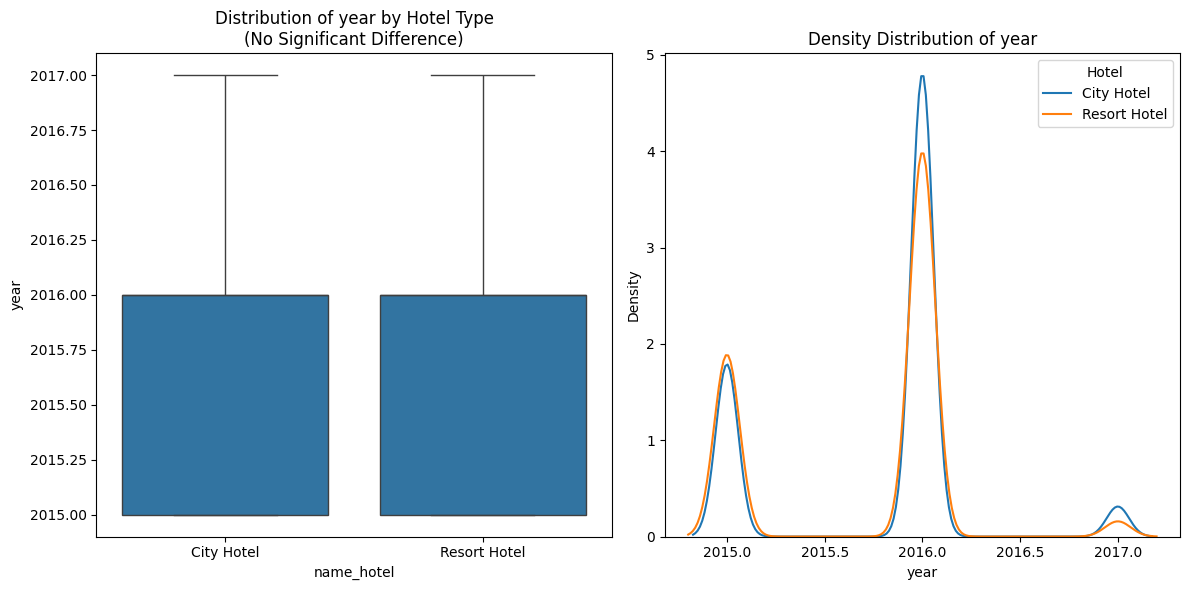


Plotting month (Effect size: 0.006)


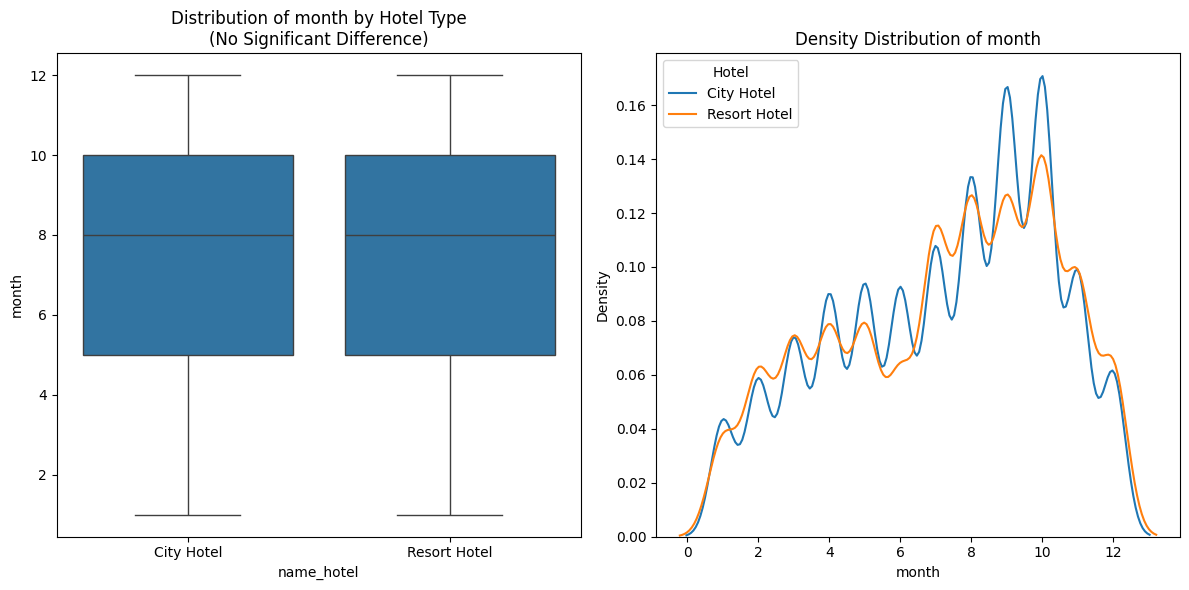


Plotting number (Effect size: 0.007)


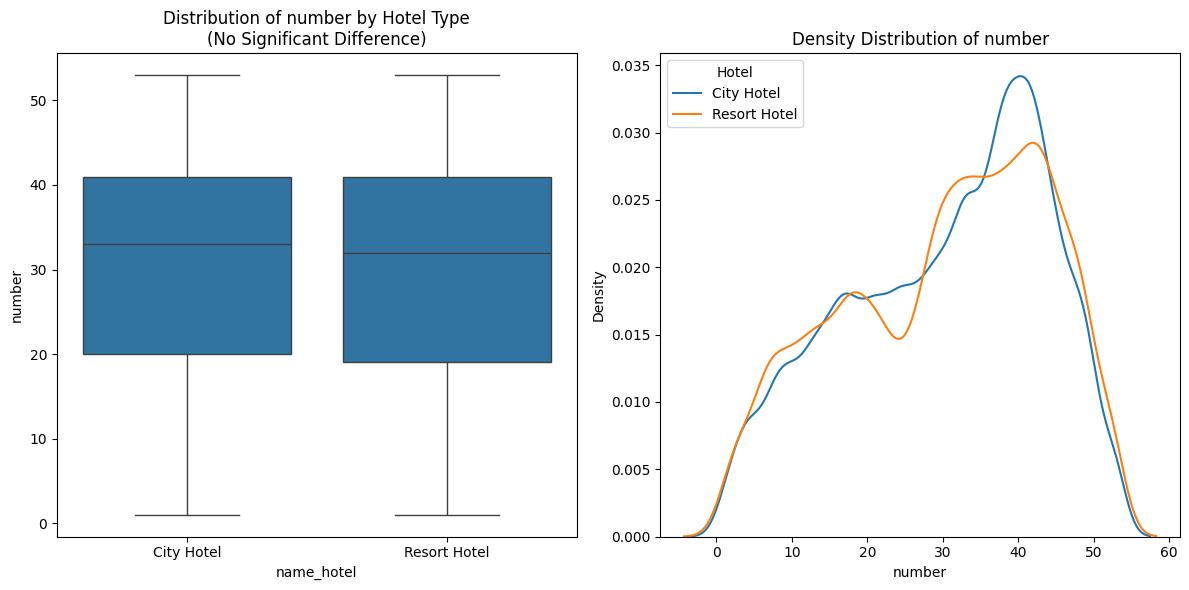


Plotting day (Effect size: 0.006)


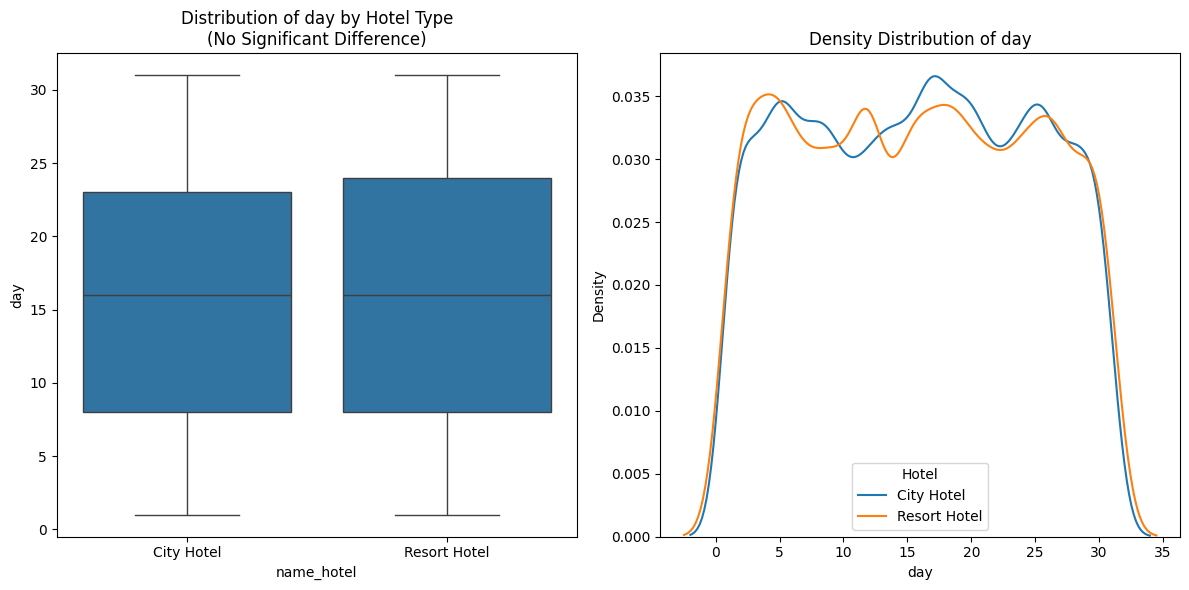


Plotting reservation_days_advance (Effect size: 0.178)


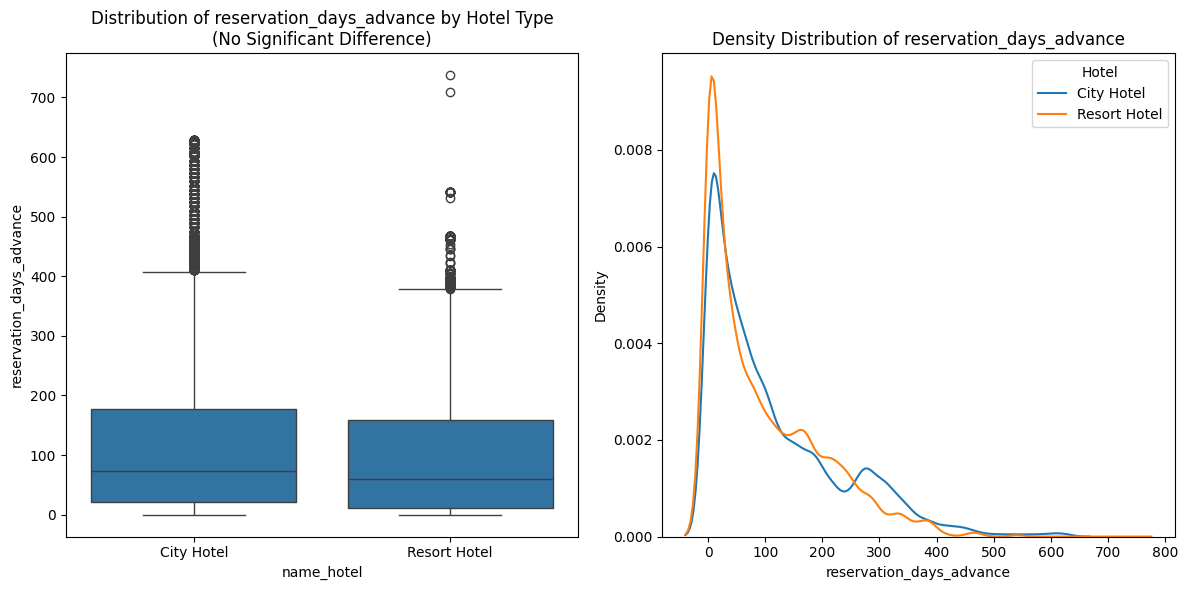


Plotting weekend_nights (Effect size: 0.411)


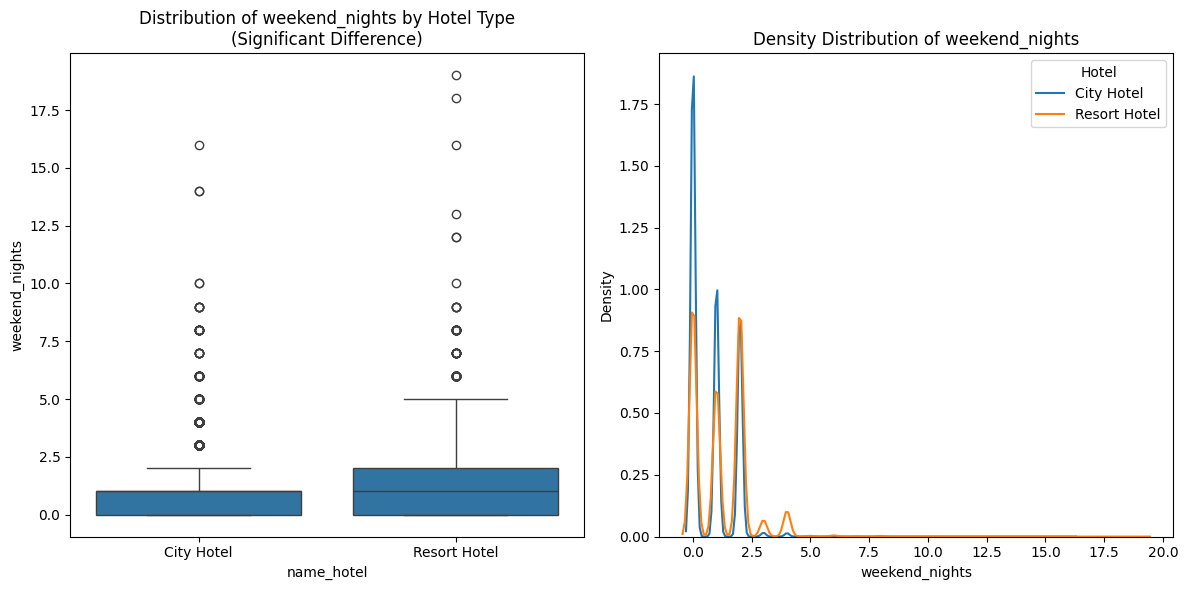


Plotting week_nights (Effect size: 0.493)


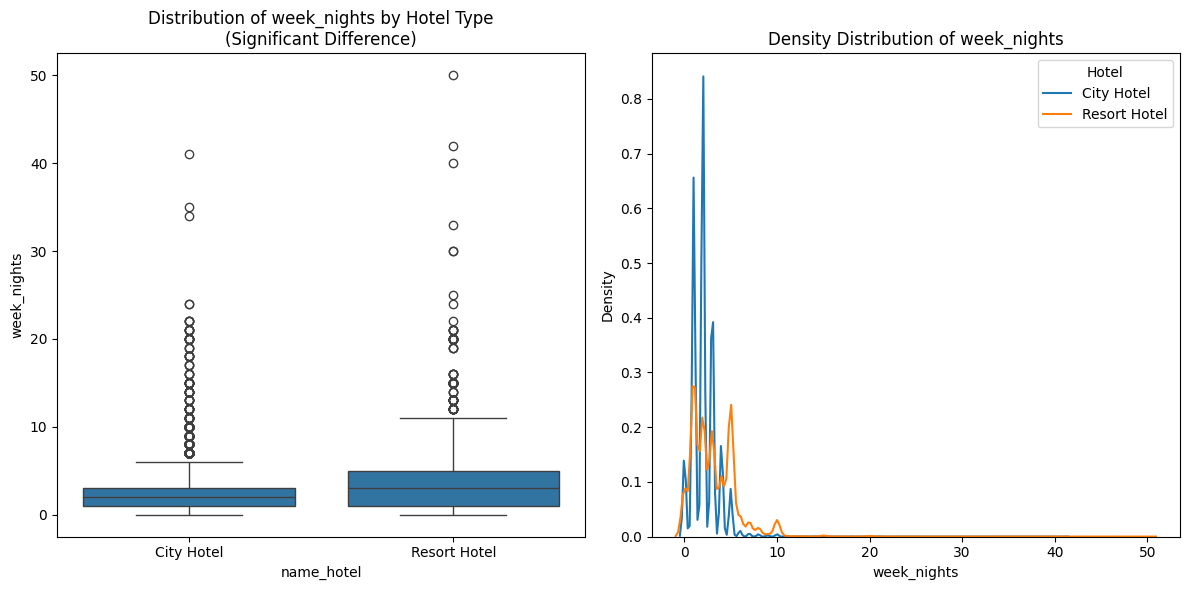


Plotting num_adults (Effect size: 0.063)


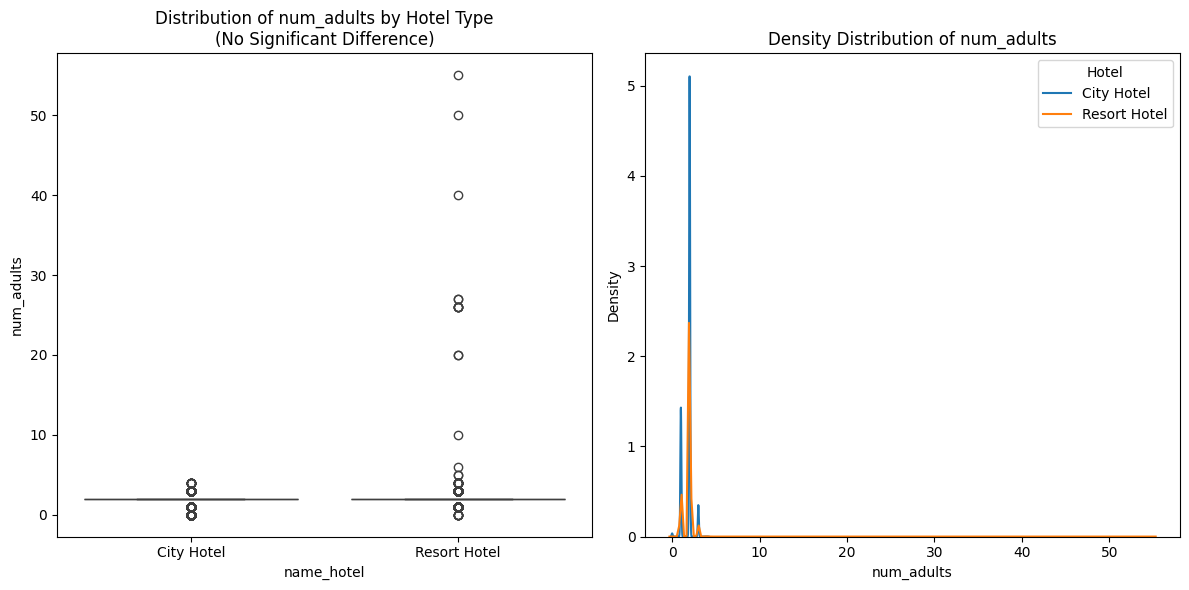


Plotting num_children (Effect size: 0.078)


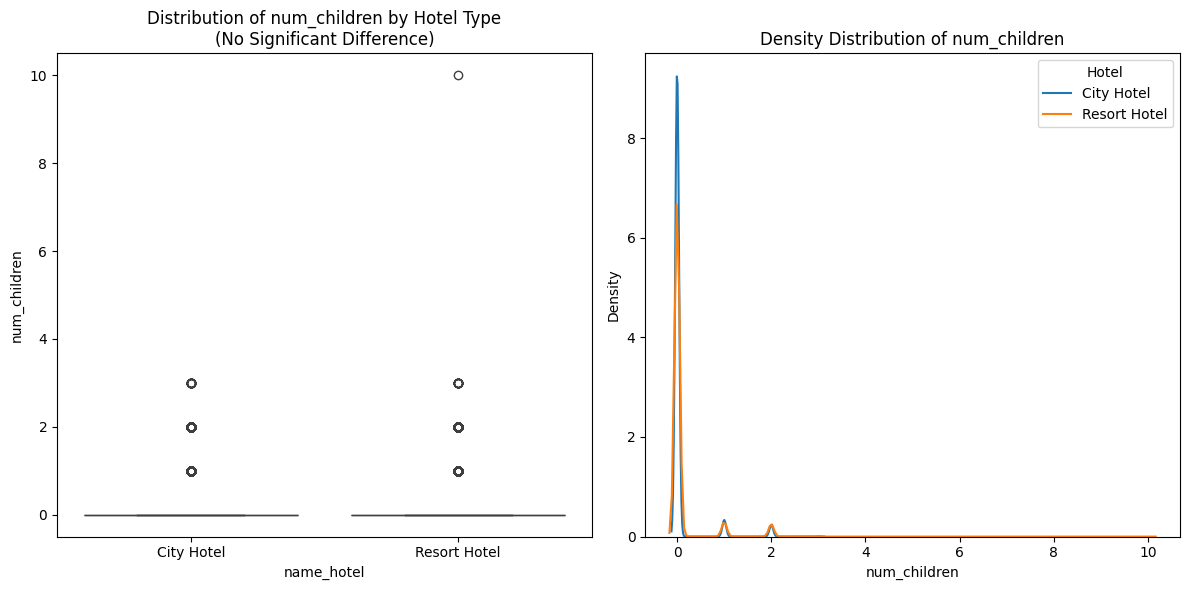


Plotting num_babies (Effect size: 0.090)


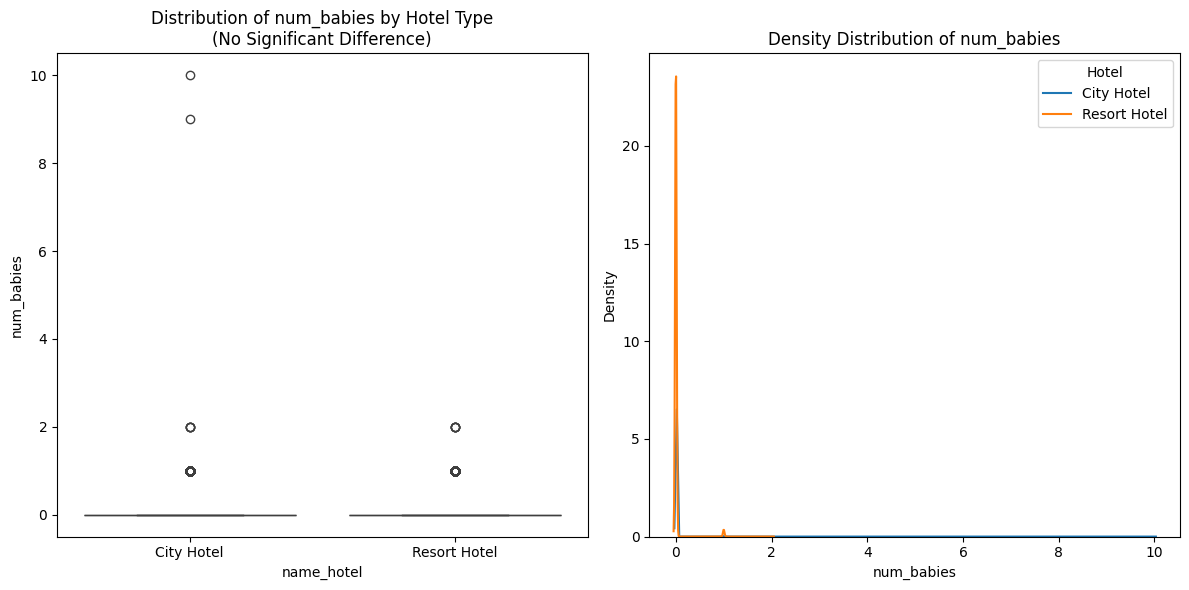


Plotting returning (Effect size: 0.050)


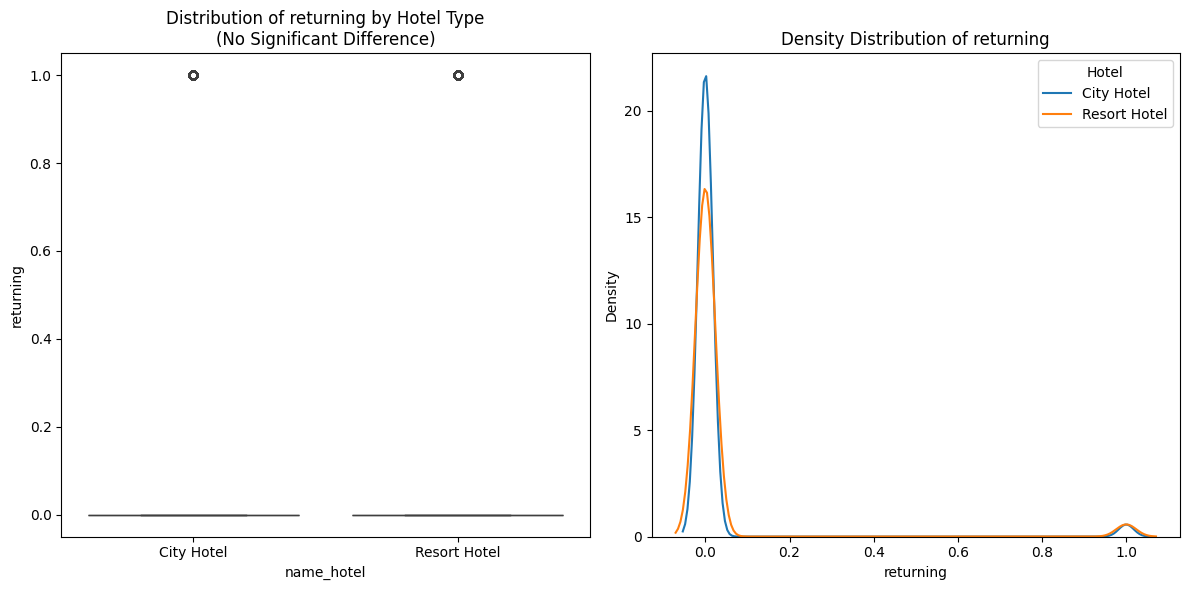


Plotting reservation_changes (Effect size: 0.157)


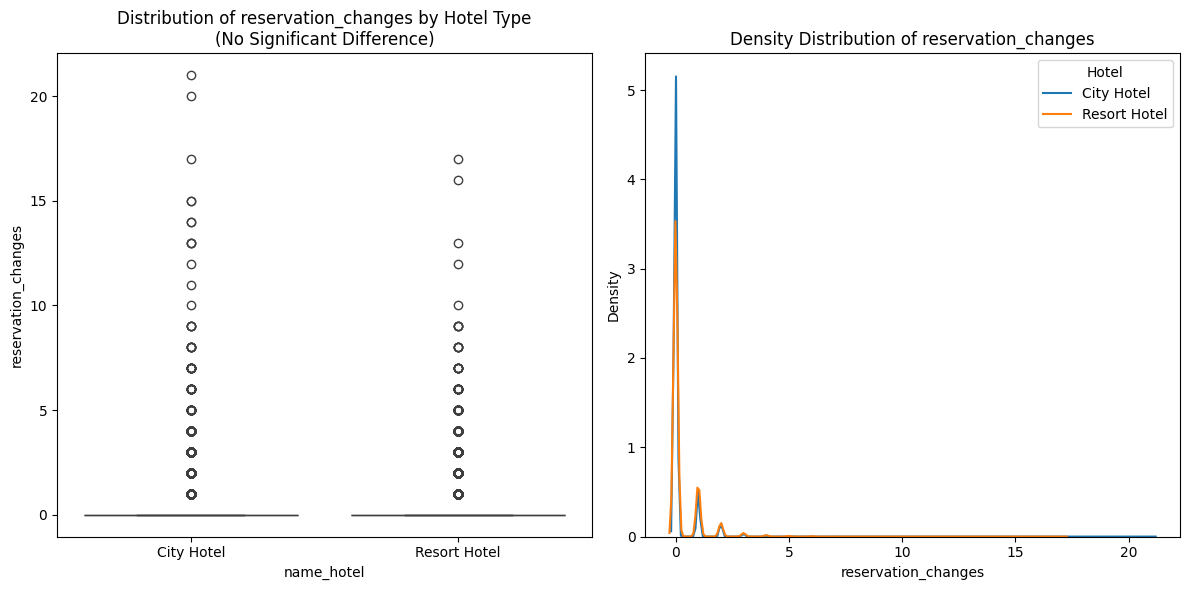


Plotting waiting_list (Effect size: 0.219)


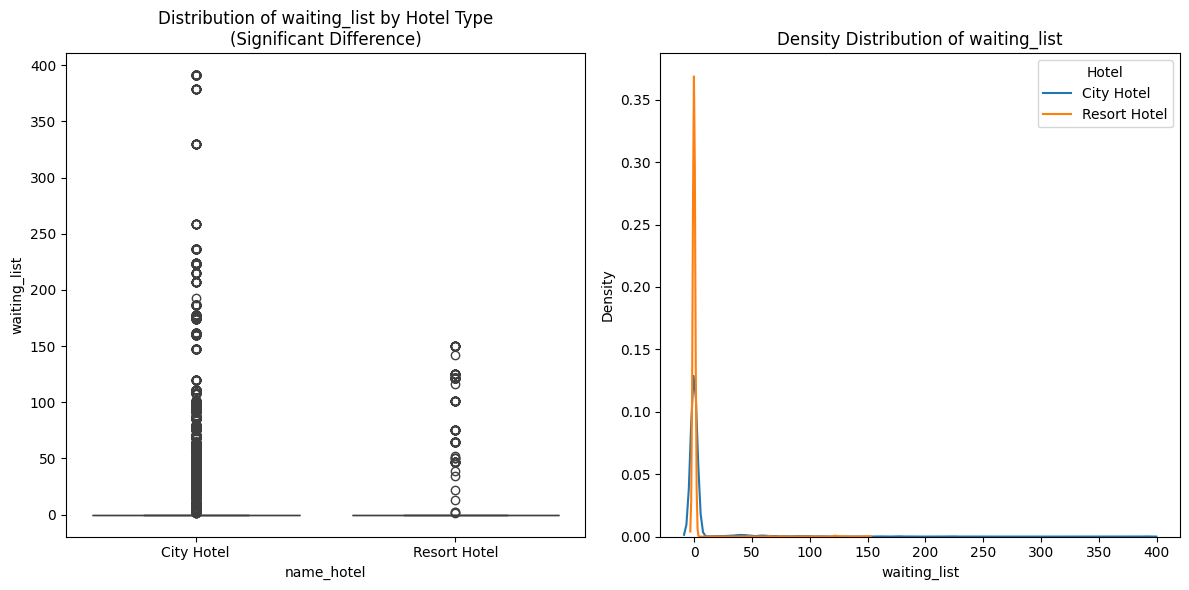


Plotting average_rate (Effect size: 0.203)


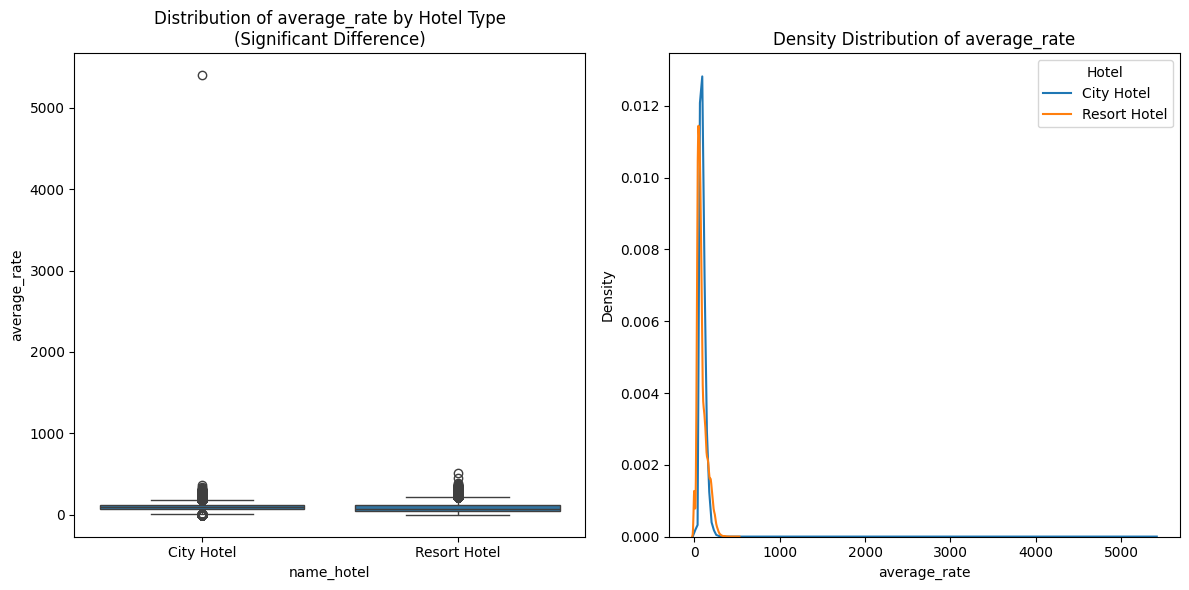


Plotting num_vehicles (Effect size: 0.415)


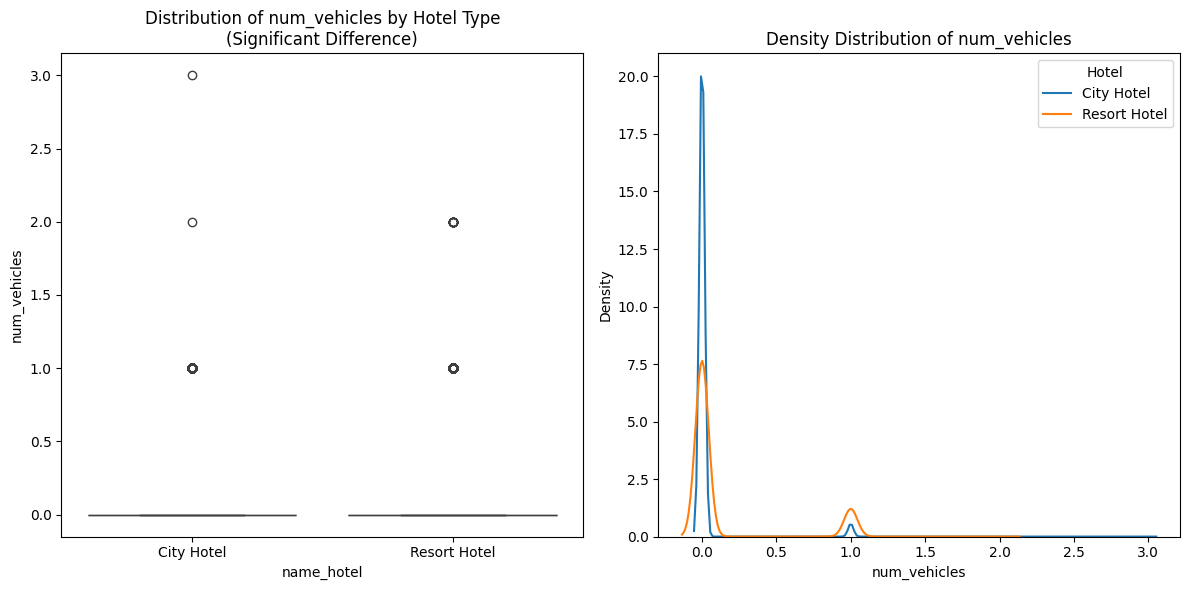


Plotting num_cancellations (Effect size: 0.030)


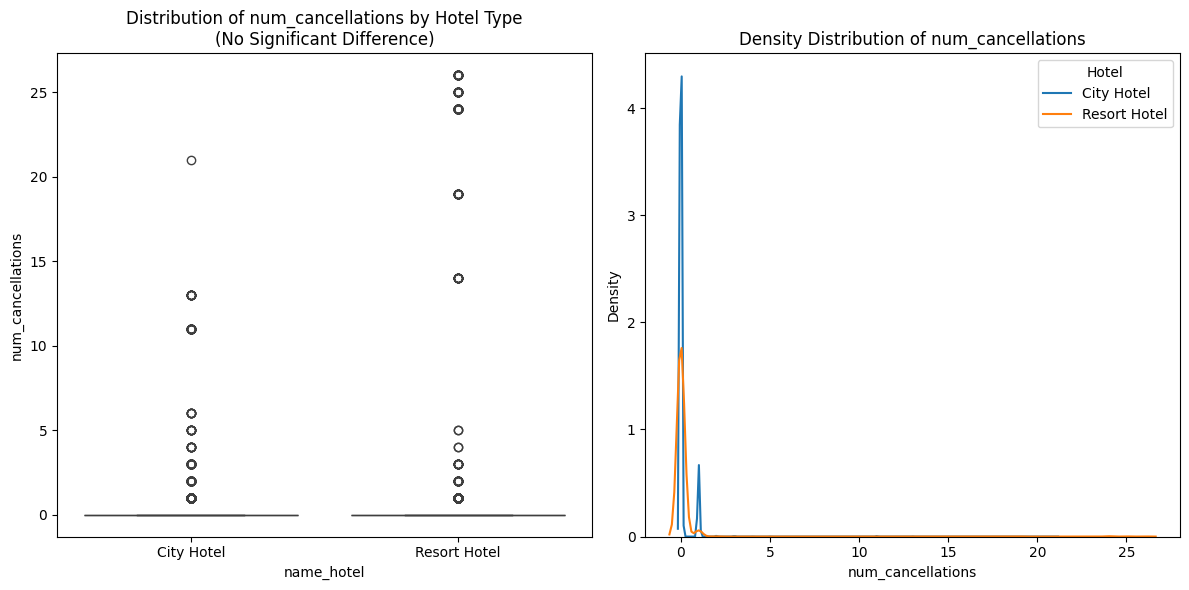


Plotting num_bookings_not_canceled (Effect size: 0.002)


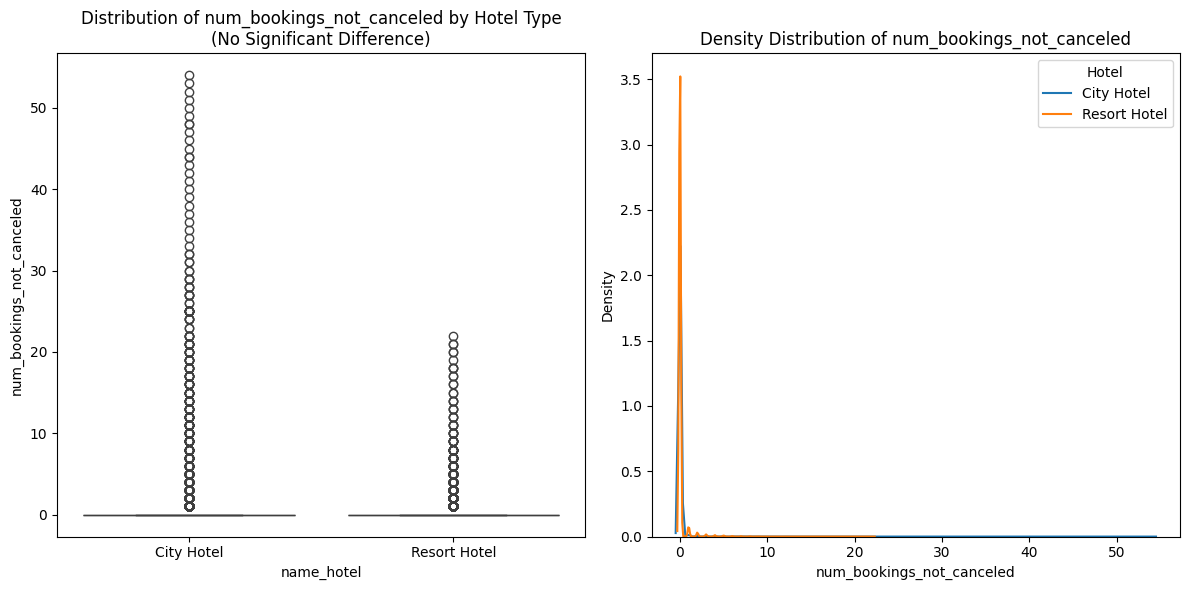


Plotting special_requests (Effect size: 0.110)


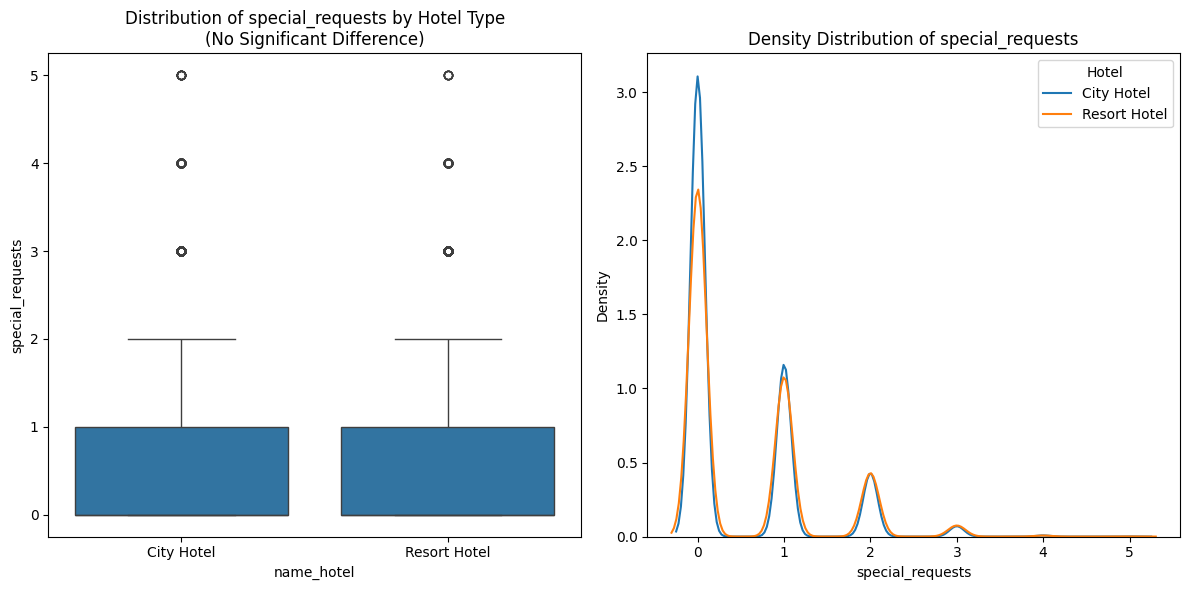


Plotting total_length_of_stay (Effect size: 0.496)


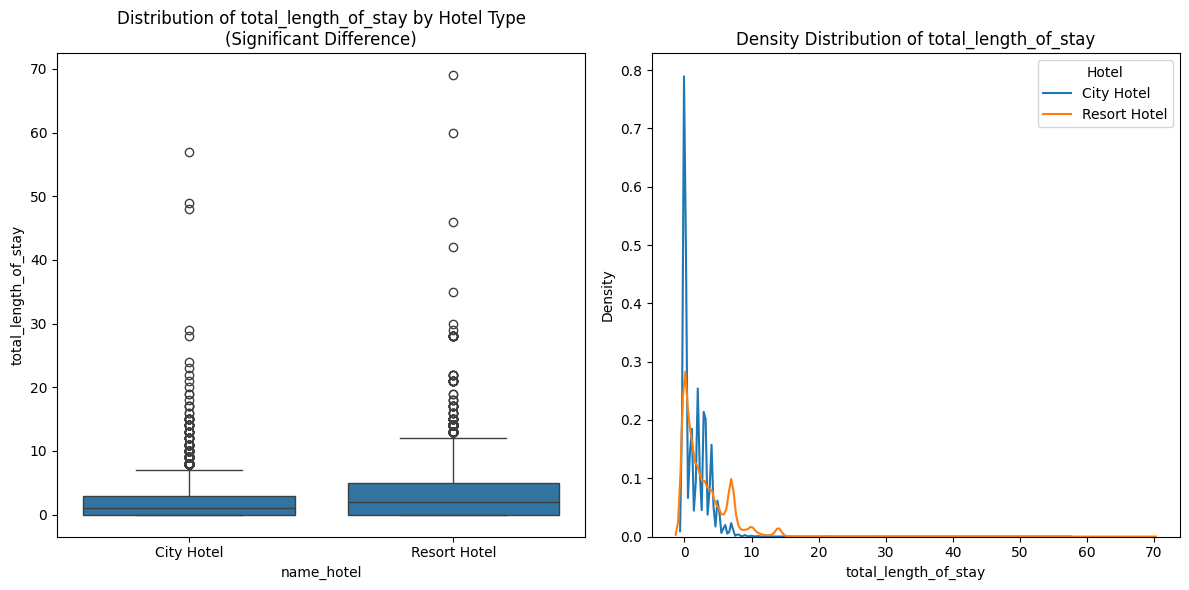


Plotting total_spending (Effect size: 0.488)


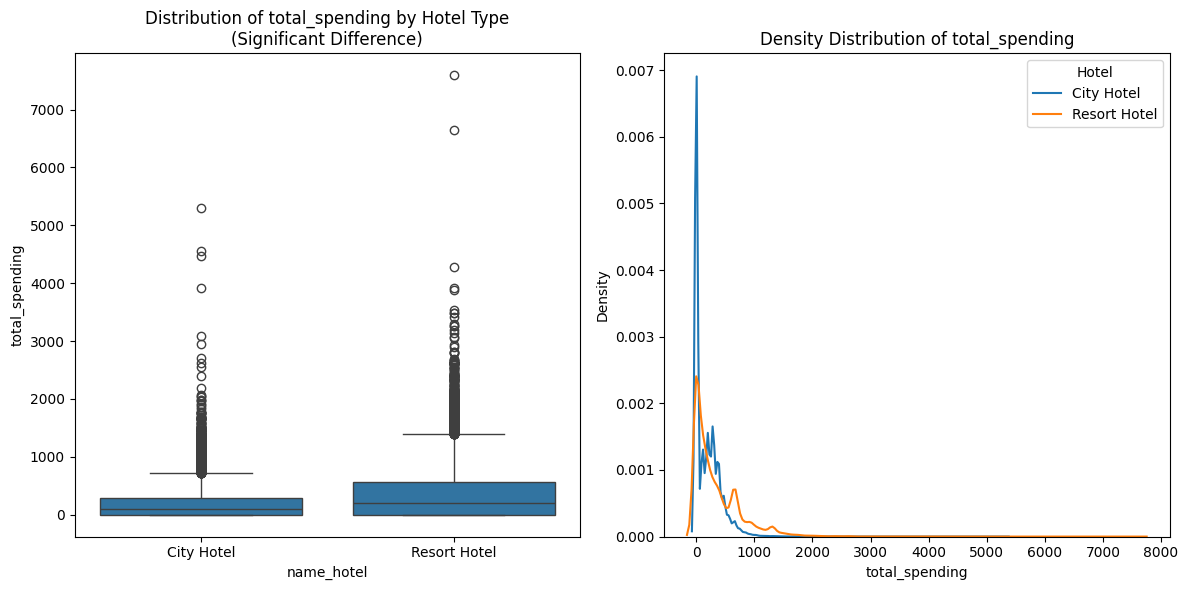


Plotting target_binary (Effect size: 0.320)


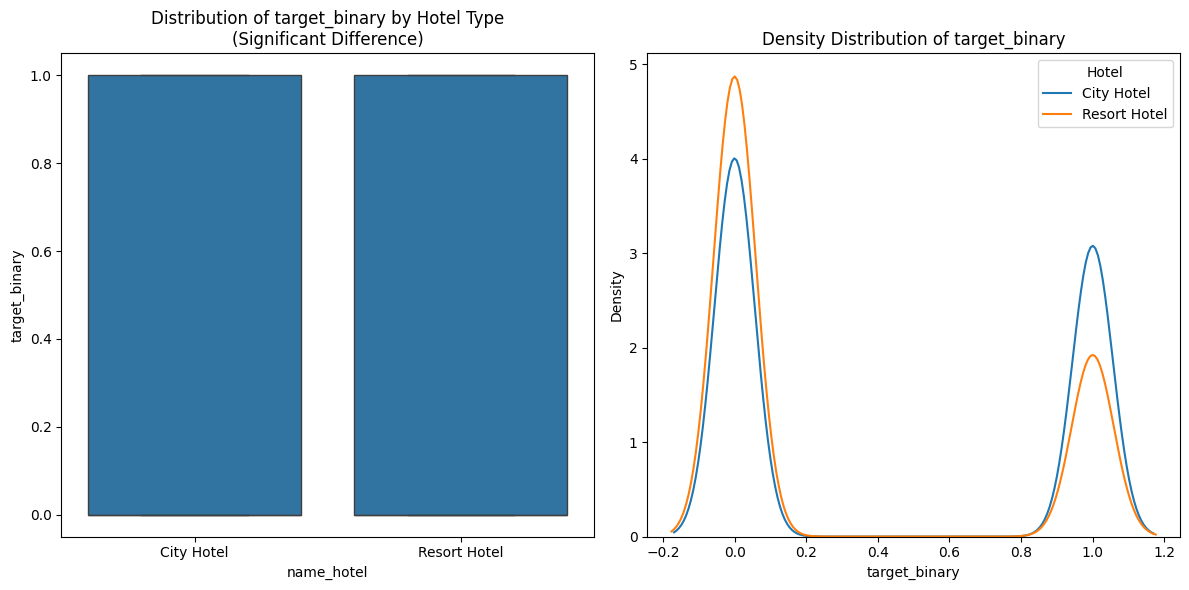


Plotting has_deposit (Effect size: 0.414)


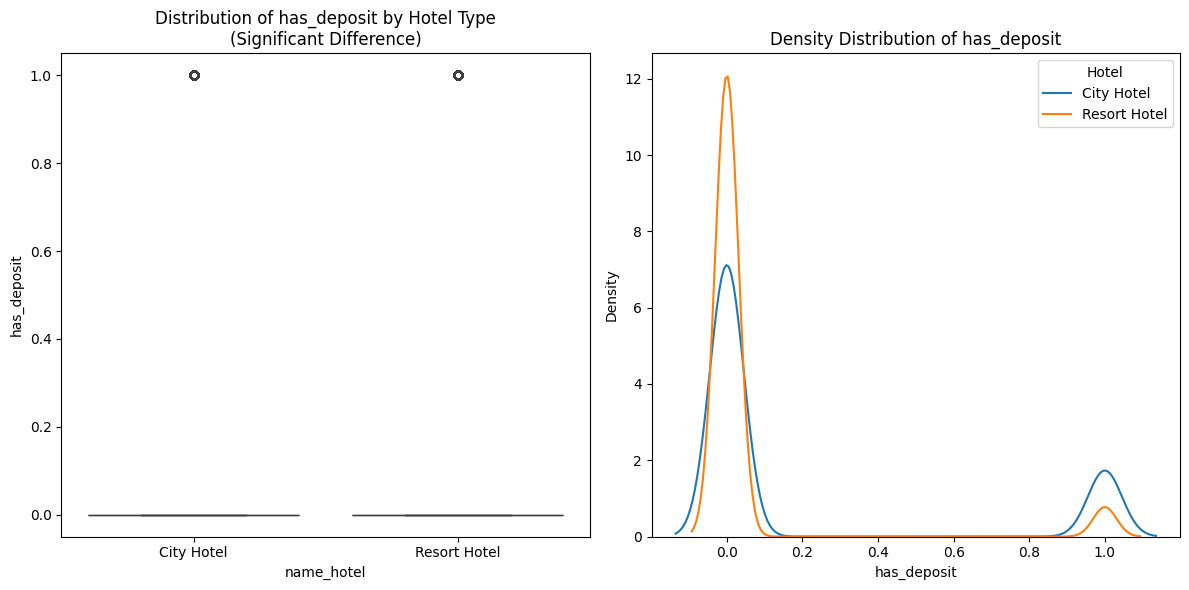


Plotting relative_price (Effect size: 0.436)


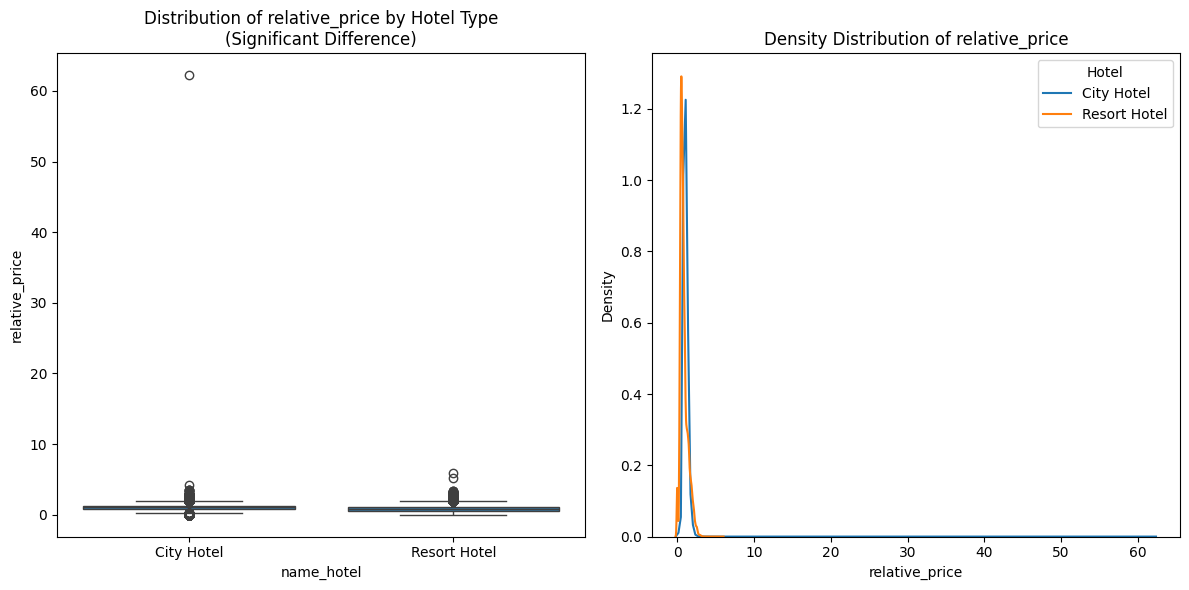


Plotting got_reserved_room (Effect size: 0.278)


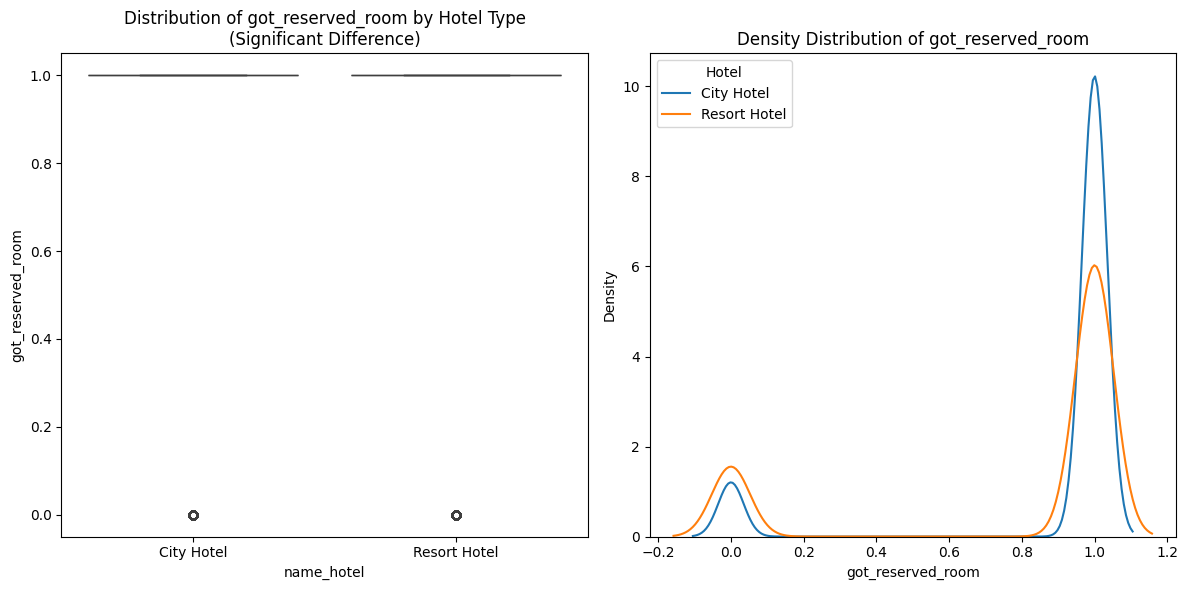


=== Categorical Variables ===

Plotting status (Cramer's V: 0.152)


<Figure size 1200x600 with 0 Axes>

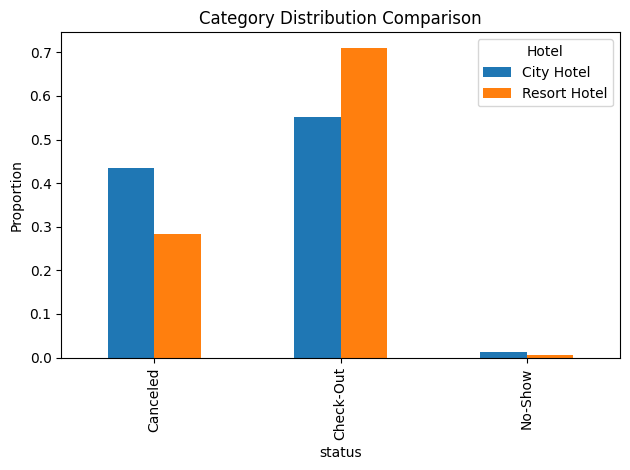


Plotting status_date (Cramer's V: 0.337)


<Figure size 1200x600 with 0 Axes>

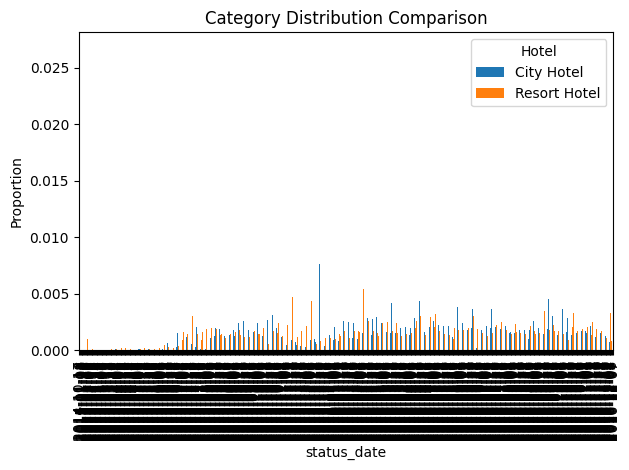


Plotting room_type (Cramer's V: 0.337)


<Figure size 1200x600 with 0 Axes>

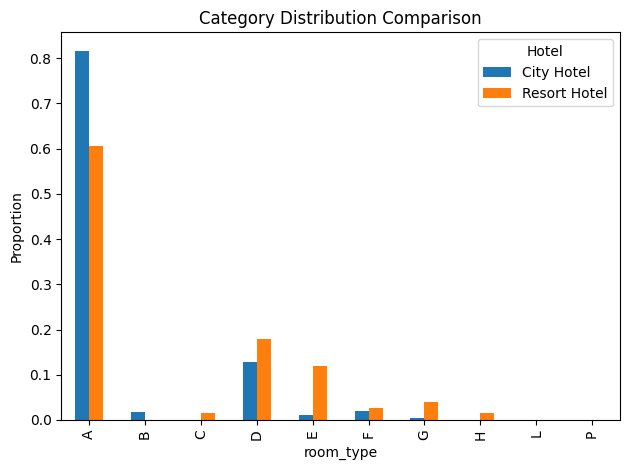


Plotting meal (Cramer's V: 0.289)


<Figure size 1200x600 with 0 Axes>

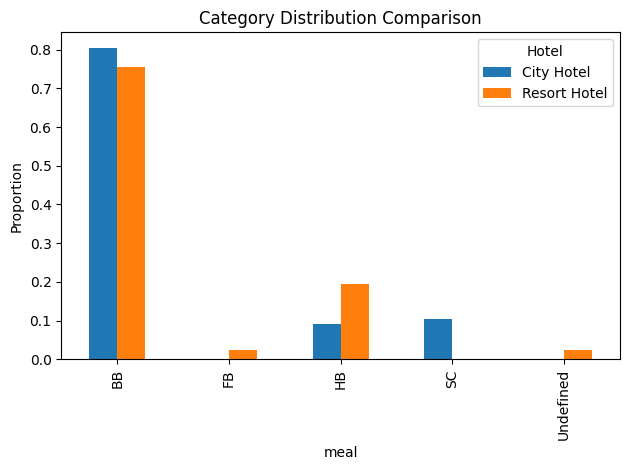


Plotting CRM (Cramer's V: 0.151)


<Figure size 1200x600 with 0 Axes>

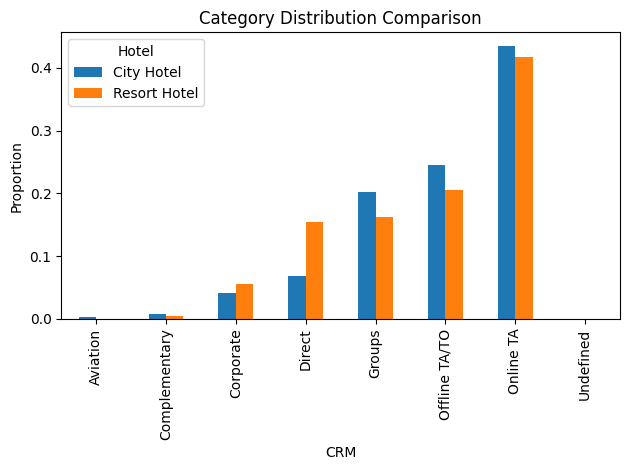


Plotting room_assigned (Cramer's V: 0.401)


<Figure size 1200x600 with 0 Axes>

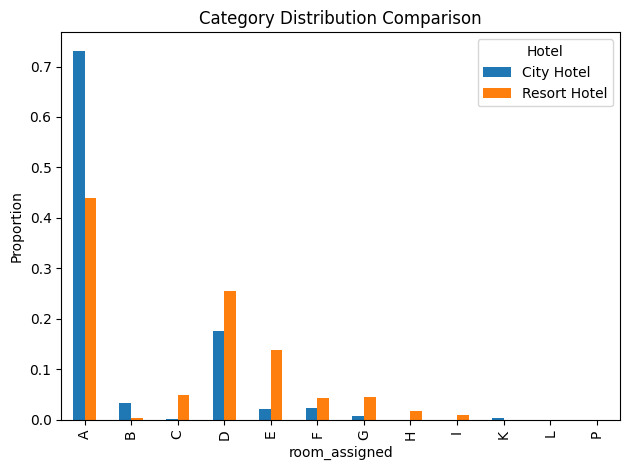


Plotting deposit (Cramer's V: 0.193)


<Figure size 1200x600 with 0 Axes>

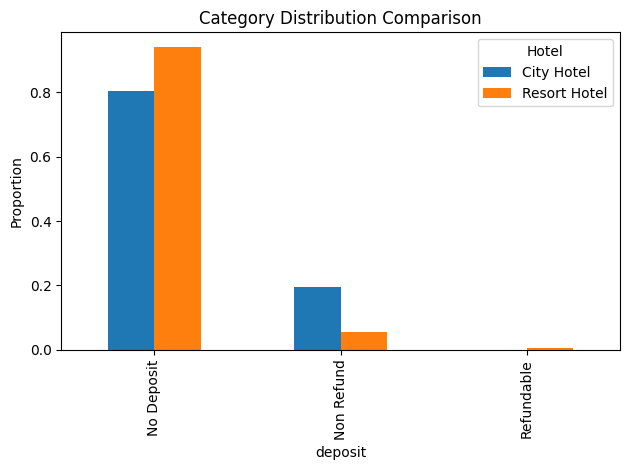


Plotting segment (Cramer's V: 0.070)


<Figure size 1200x600 with 0 Axes>

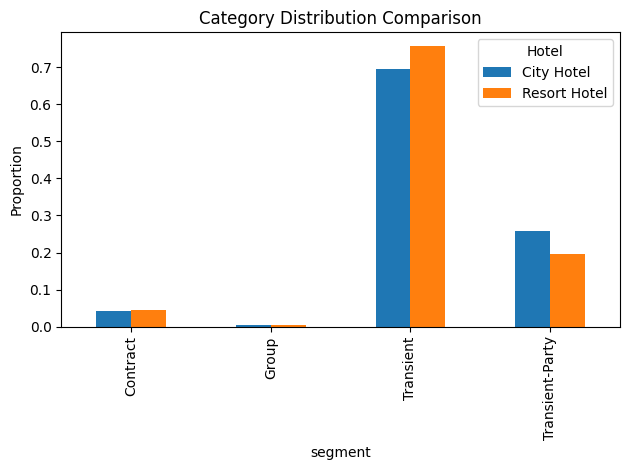

In [160]:
plot_distributions(reservations, results, show_all=True)

In [161]:
def target_relationships(df):
    '''
    analyze relationships between features and target variables, to see which seem to create the most separability.
    this is a complement to the visualizations, not to rely only on info conveyed on visualizations, which we might miss.
    '''
    results = {
        'numerical_analysis': {},
        'categorical_analysis': {}
    }

    df = prepare_target_var(df)
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    numerical_cols.remove('target_binary')

    for col in numerical_cols:
        # we use the r coefficient to measure relationship between feature and target variable. 
        # varies between -1 and 1, 0 implying no correlation. 
        #stats.pointbiserialr should yield the same results as stats.pearsonr, which we studied in stats class.
        correlation = stats.pointbiserialr(df[col], df['target_binary'])
        
        fulfilled = df[df['target_binary'] == 0][col]
        canceled = df[df['target_binary'] == 1][col]
        pooled_std = np.sqrt((fulfilled.var() + canceled.var()) / 2)
        effect_size = abs(fulfilled.mean() - canceled.mean()) / pooled_std
        results['numerical_analysis'][col] = {
            'correlation': correlation.correlation,
            'p_value': correlation.pvalue,
            'effect_size': effect_size,
            'significant': correlation.pvalue < 0.05,
            'meaningful': abs(correlation.correlation) > 0.1 # we
        }
    
    # analyze categorical variables
    categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
    if 'status' in categorical_cols:
        categorical_cols.remove('status')
    
    for col in categorical_cols:
        # chi-square independence test
        contingency = pd.crosstab(df[col], df['target_binary'])
        chi2, p_value, _, _ = stats.chi2_contingency(contingency)
        
        n = contingency.sum().sum()
        min_dim = min(contingency.shape) - 1
        strength = np.sqrt(chi2 / (n * min_dim))
        
        results['categorical_analysis'][col] = {
            'chi2': chi2,
            'p_value': p_value,
            'cramer_v': strength,
            'significant': p_value < 0.05,
            'meaningful': strength > 0.1
        }
    
    return results


In [162]:
target_results = target_relationships(reservations)
target_results

{'numerical_analysis': {'year': {'correlation': np.float64(0.12171926871397269),
   'p_value': np.float64(1.1255711253710384e-259),
   'effect_size': np.float64(0.24491462700750186),
   'significant': np.True_,
   'meaningful': np.True_},
  'month': {'correlation': np.float64(-0.0040883864838010125),
   'p_value': np.float64(0.2493457705461086),
   'effect_size': np.float64(0.008415916502372594),
   'significant': np.False_,
   'meaningful': np.False_},
  'number': {'correlation': np.float64(-0.009007326545693722),
   'p_value': np.float64(0.011150816296840145),
   'effect_size': np.float64(0.018544392637852312),
   'significant': np.True_,
   'meaningful': np.False_},
  'day': {'correlation': np.float64(-0.006519371825539072),
   'p_value': np.float64(0.06622408805908185),
   'effect_size': np.float64(0.013398854786412057),
   'significant': np.False_,
   'meaningful': np.False_},
  'reservation_days_advance': {'correlation': np.float64(0.3735144858614213),
   'p_value': np.float64(0.

In [163]:
def plot_target_relationships(df, target_analysis):
    """
    plot relationships between features and target variable using multiple visualization techniques.
    """
    df = prepare_target_var(df)
    
    # Numerical variable plotting
    numerical_vars = list(target_analysis['numerical_analysis'].keys())
    n_num = len(numerical_vars)
    
    if n_num > 0:
        for var in numerical_vars:
            metrics = target_analysis['numerical_analysis'][var]
            
            # Create figure with 2 subplots side by side
            fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
            fig.suptitle(f'{var} vs Target\nCorrelation: {metrics["correlation"]:.3f} | p-value: {metrics["p_value"]:.3e}')
            
            # Box plot
            sns.boxplot(x='target_binary', y=var, data=df, ax=ax1)
            ax1.set_xlabel('Canceled (1) vs Fulfilled (0)')
            ax1.set_title('Box Plot')
            
            # Density plot
            for target_val in [0, 1]:
                subset = df[df['target_binary'] == target_val][var]
                sns.kdeplot(data=subset, ax=ax2, label=f'{"Canceled" if target_val == 1 else "Fulfilled"}')
            ax2.set_title('Density Plot')
            ax2.legend()
            
            plt.tight_layout()
            plt.show()
    
    # categorical variable plotting
    categorical_vars = list(target_analysis['categorical_analysis'].keys())
    
    for var in categorical_vars:
        metrics = target_analysis['categorical_analysis'][var]
        plt.figure(figsize=(12, 6))

        #normalized stacked bar plot
        props = pd.crosstab(df[var], df['target_binary'], normalize='index')
        props.plot(kind='bar', stacked=True)

        plt.title(f'{var} vs Target\nCramer\'s V: {metrics["cramer_v"]:.3f}\np-value: {metrics["p_value"]:.3e}')
        plt.xlabel(var)
        plt.ylabel('Proportion')
        plt.legend(['Fulfilled (0)', 'Canceled (1)'])
        plt.tight_layout()
        plt.show()

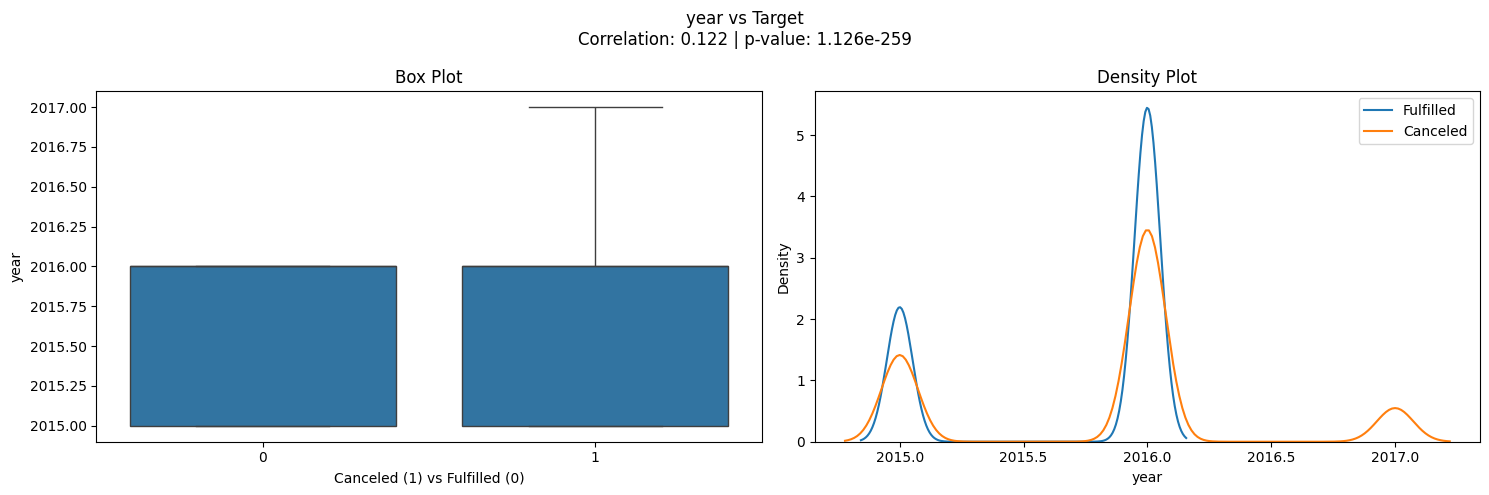

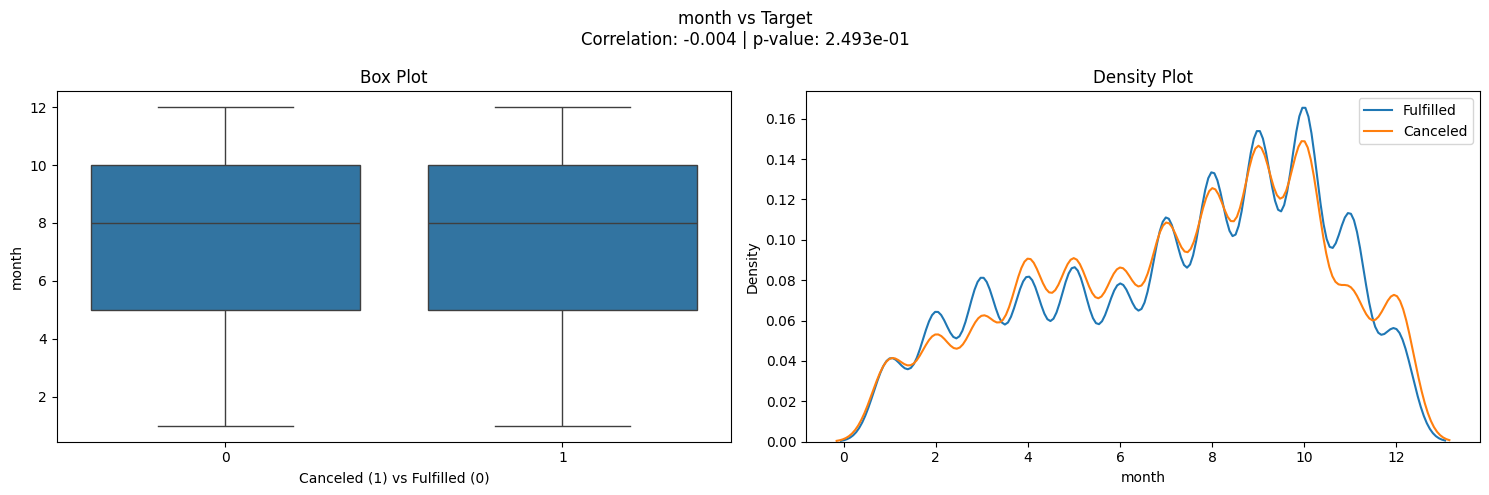

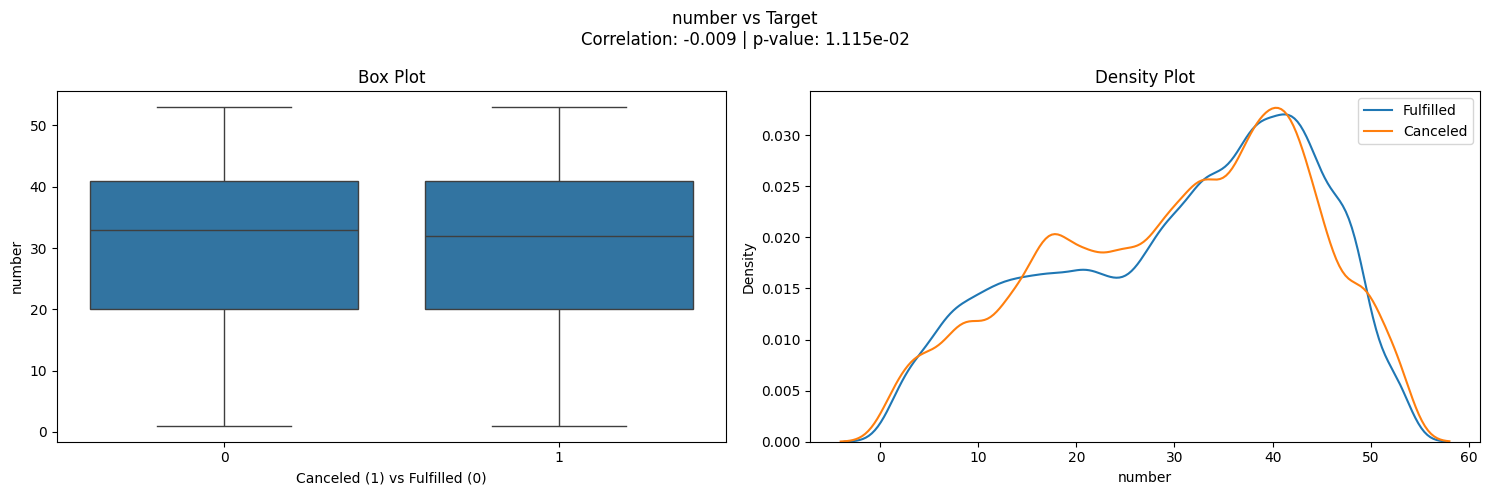

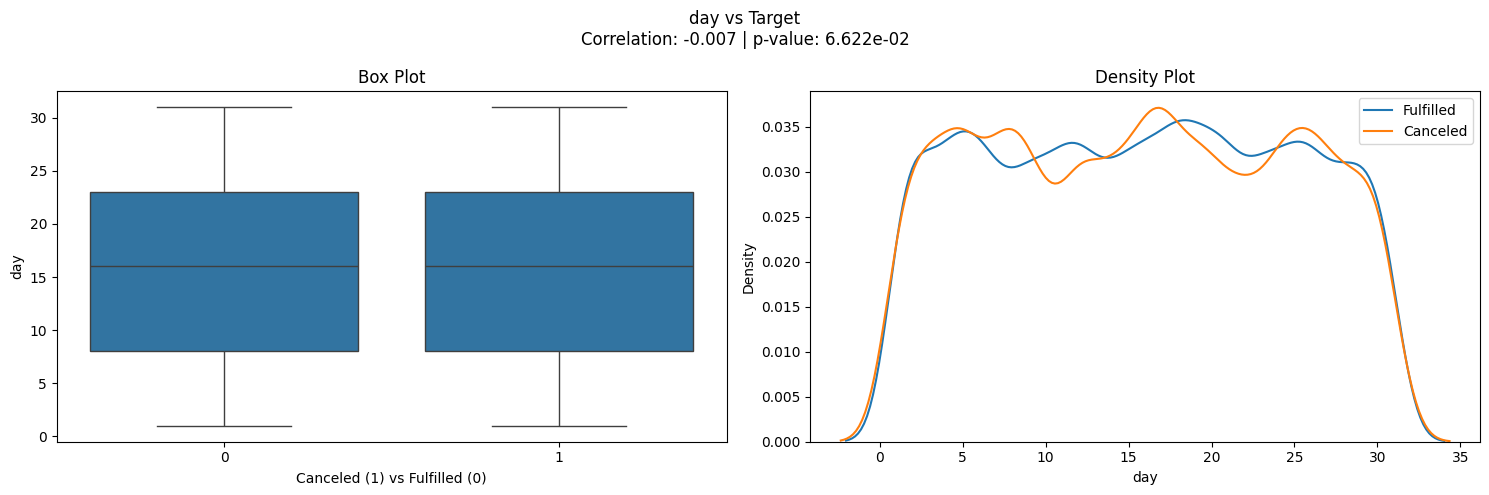

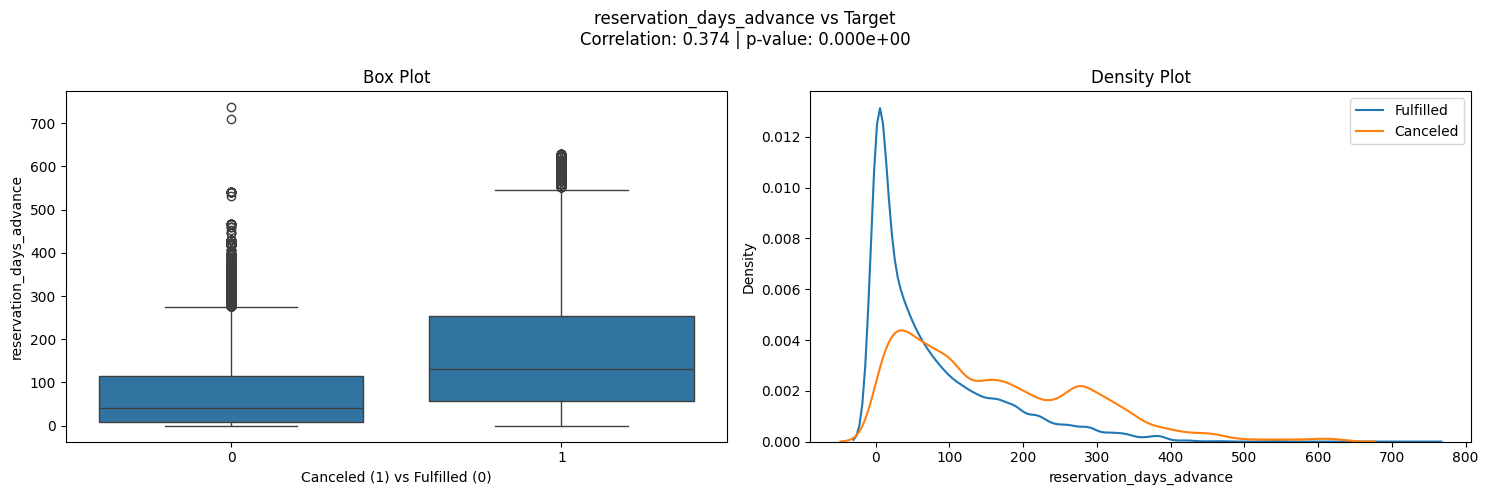

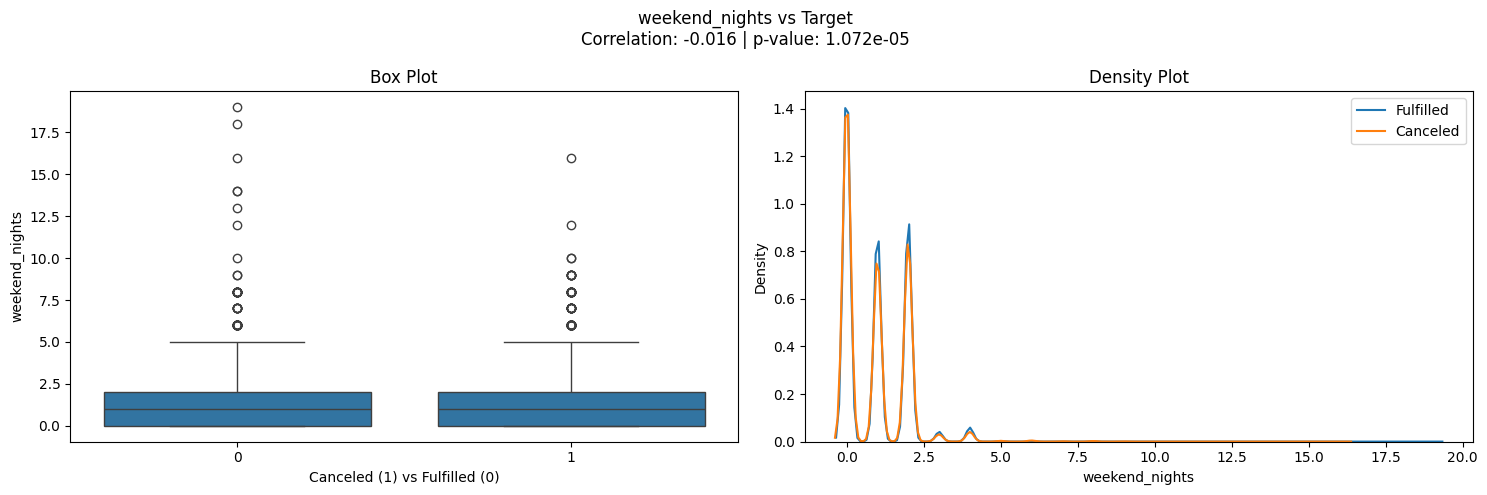

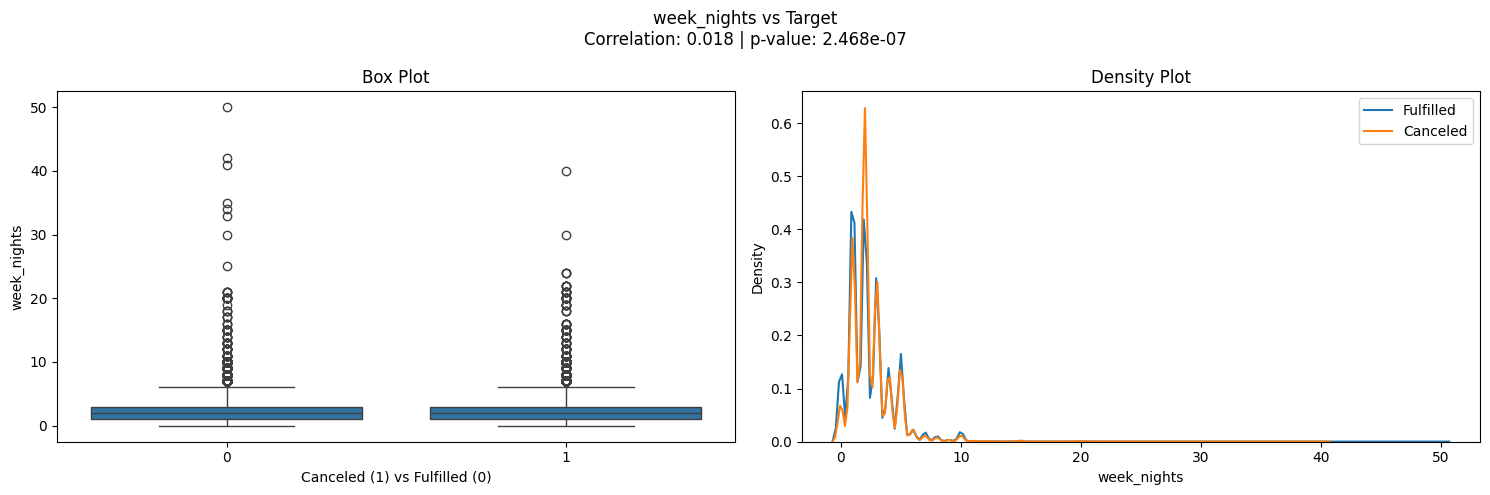

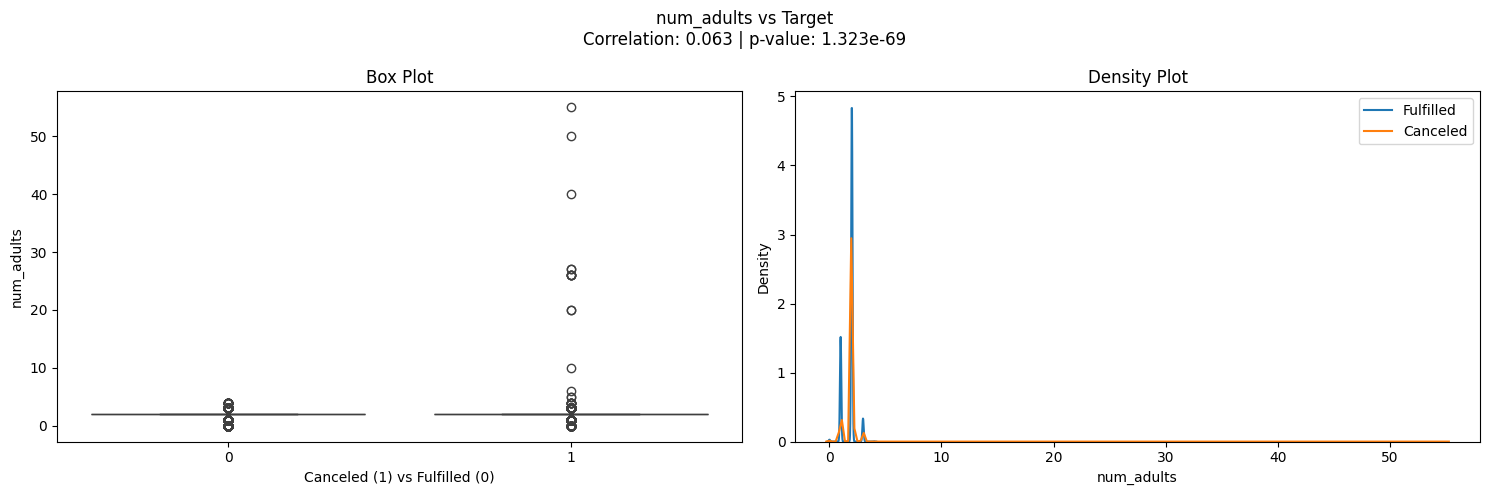

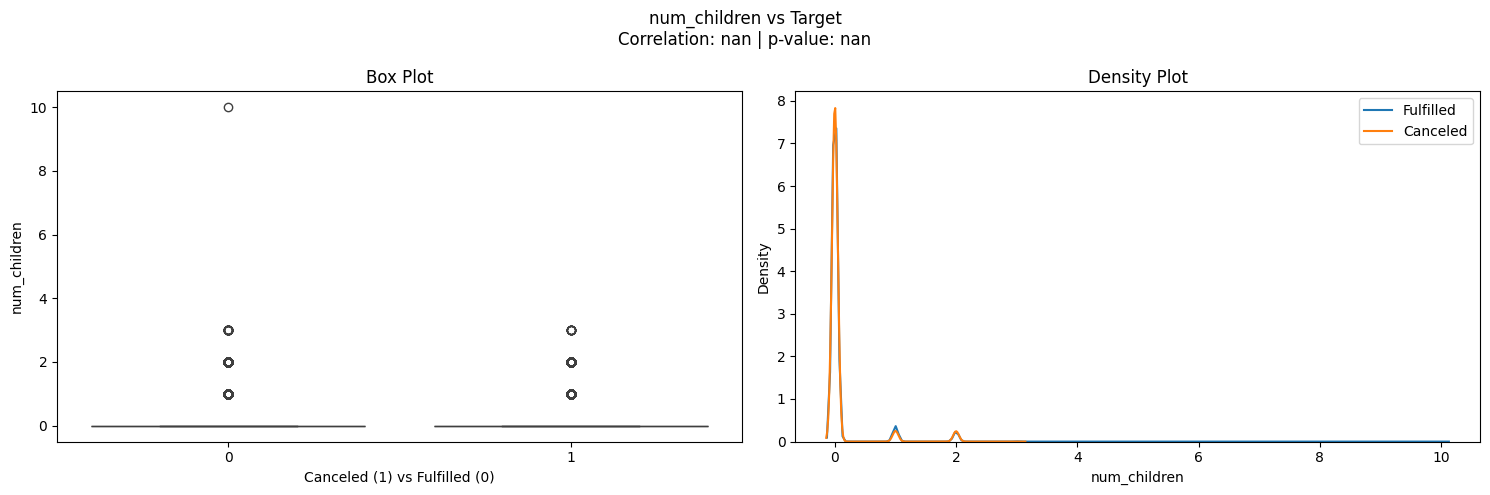

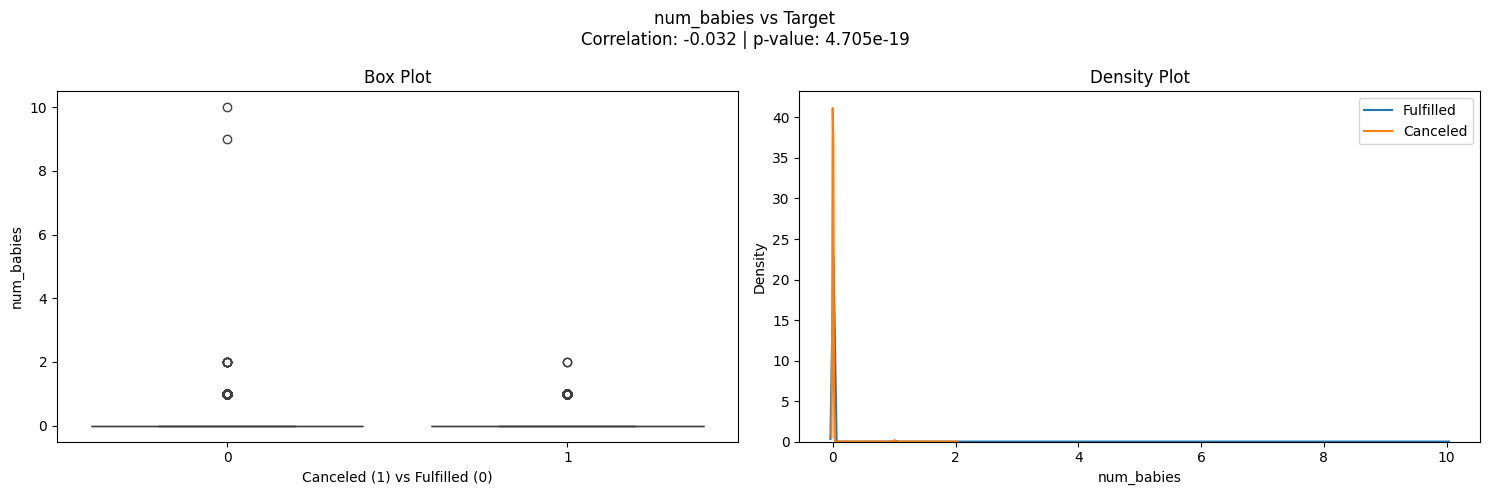

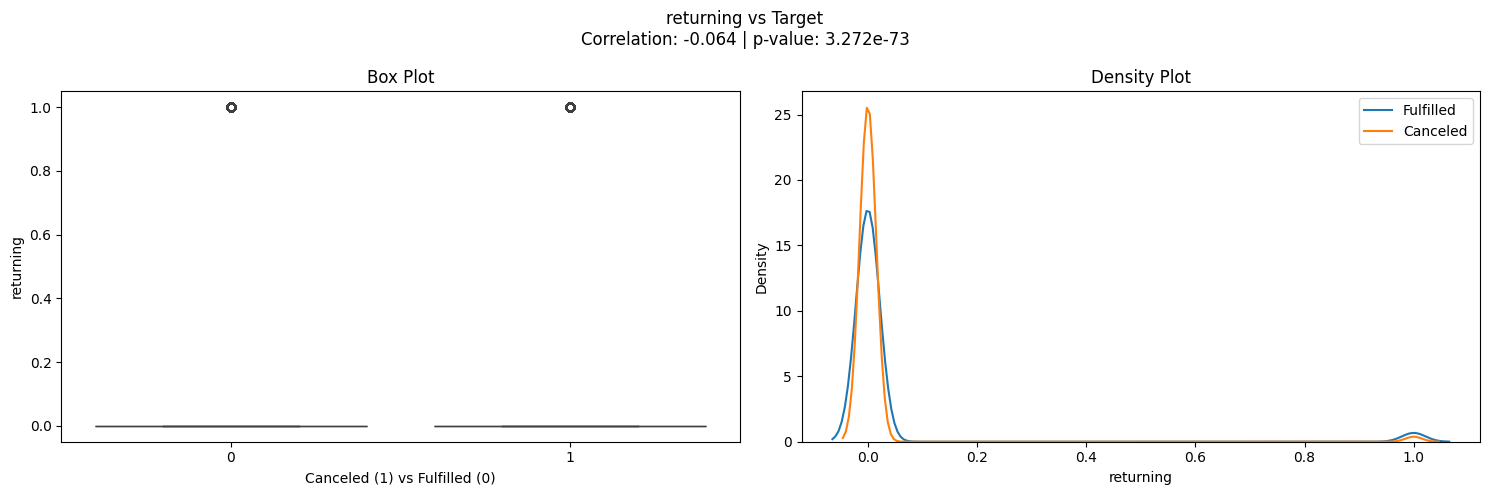

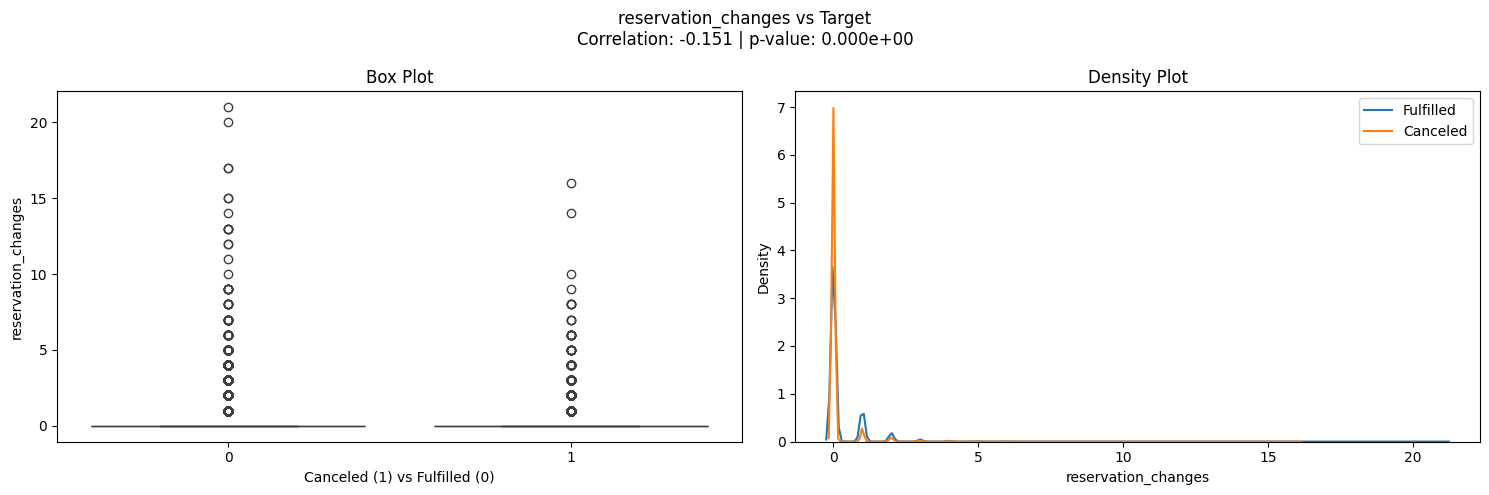

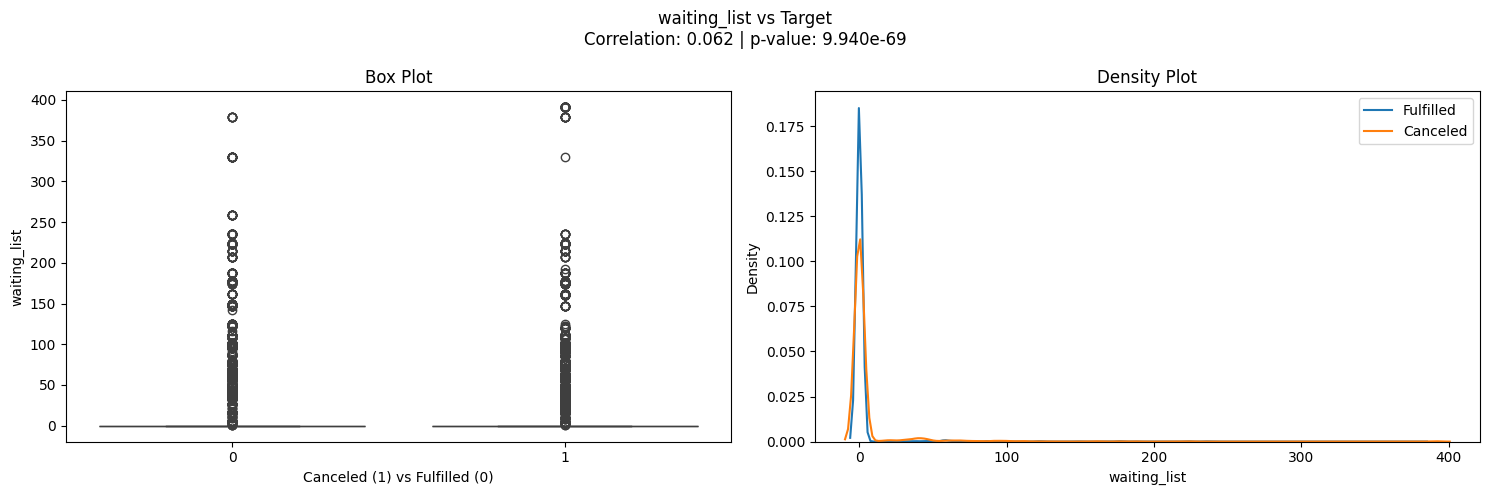

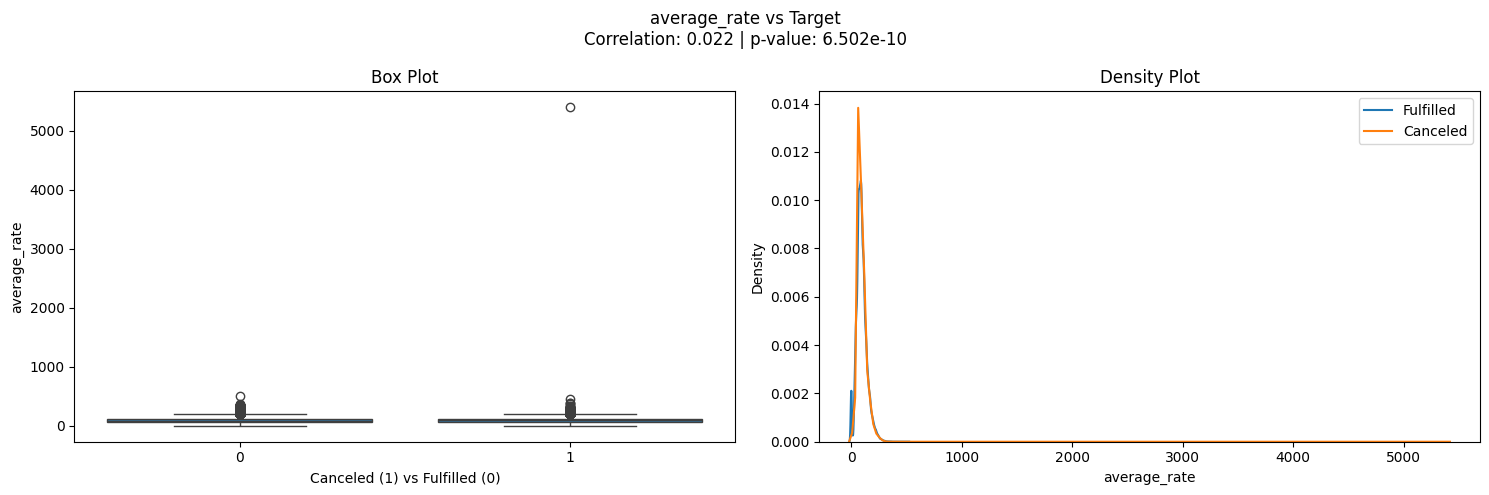

/var/folders/ql/zn80hp1x1xq2fg_1g7n3nn880000gp/T/ipykernel_4269/354252460.py:27: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=subset, ax=ax2, label=f'{"Canceled" if target_val == 1 else "Fulfilled"}')


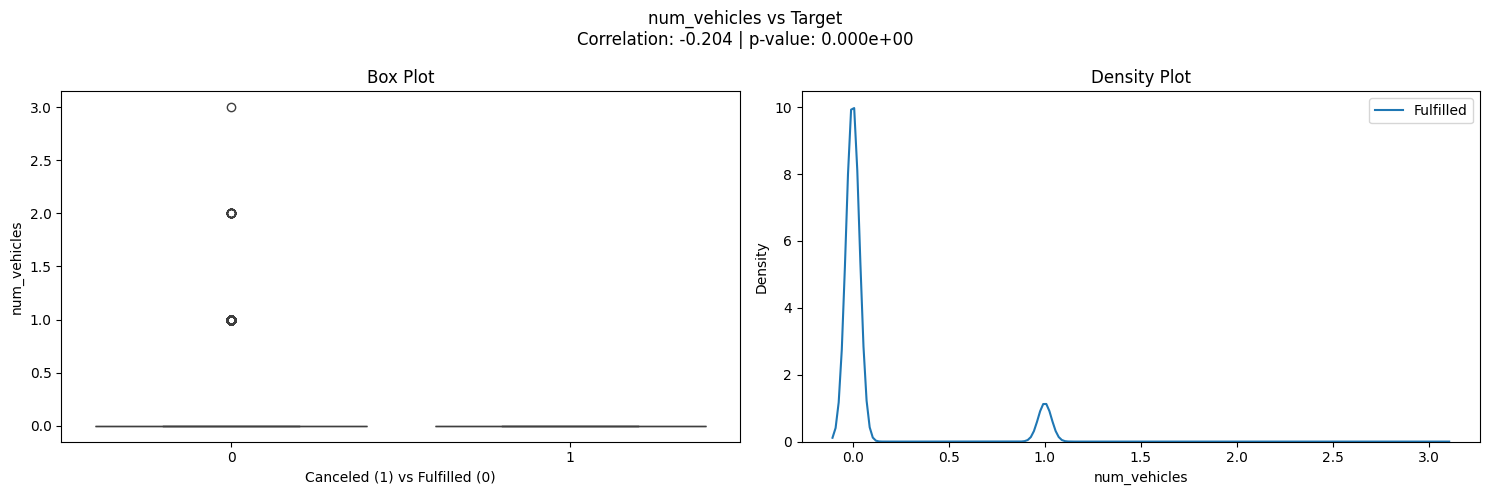

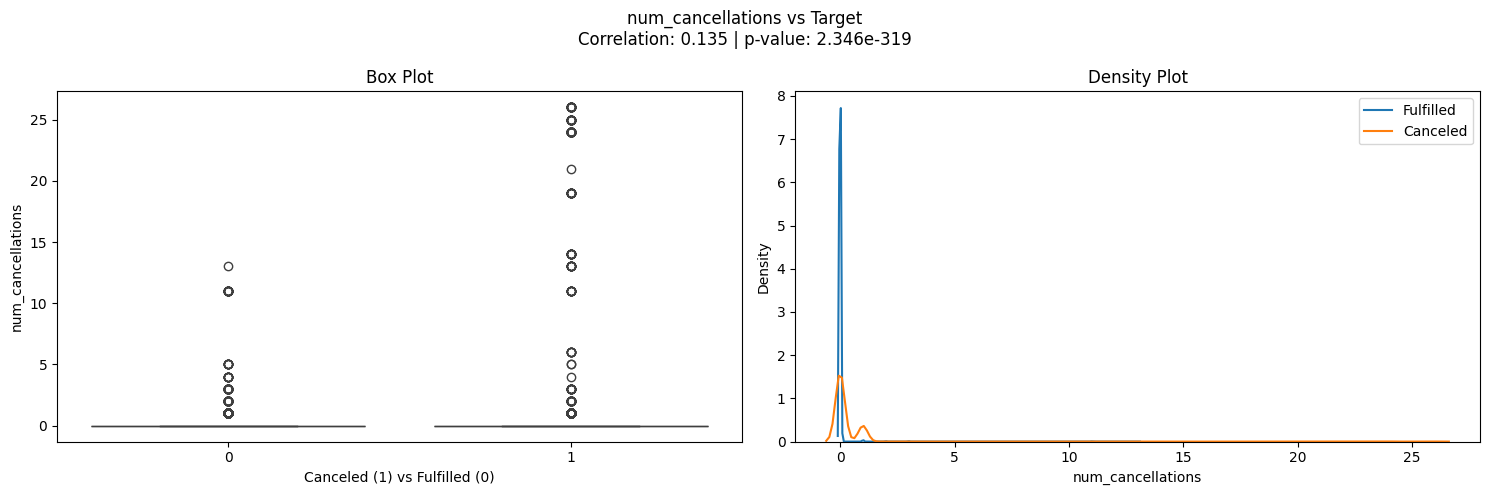

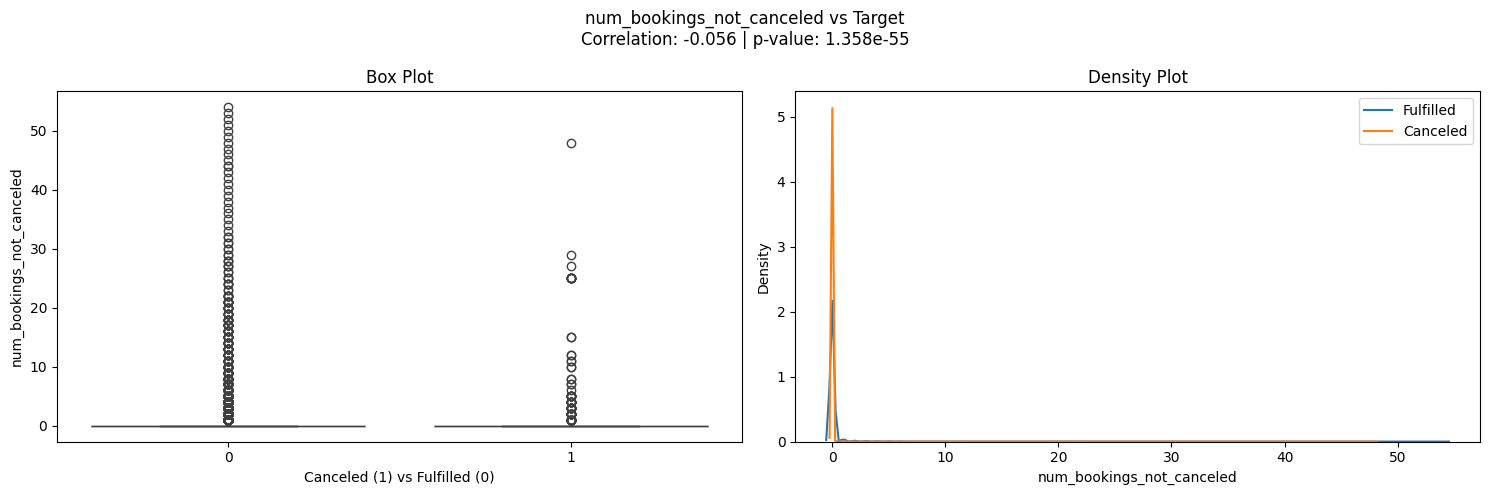

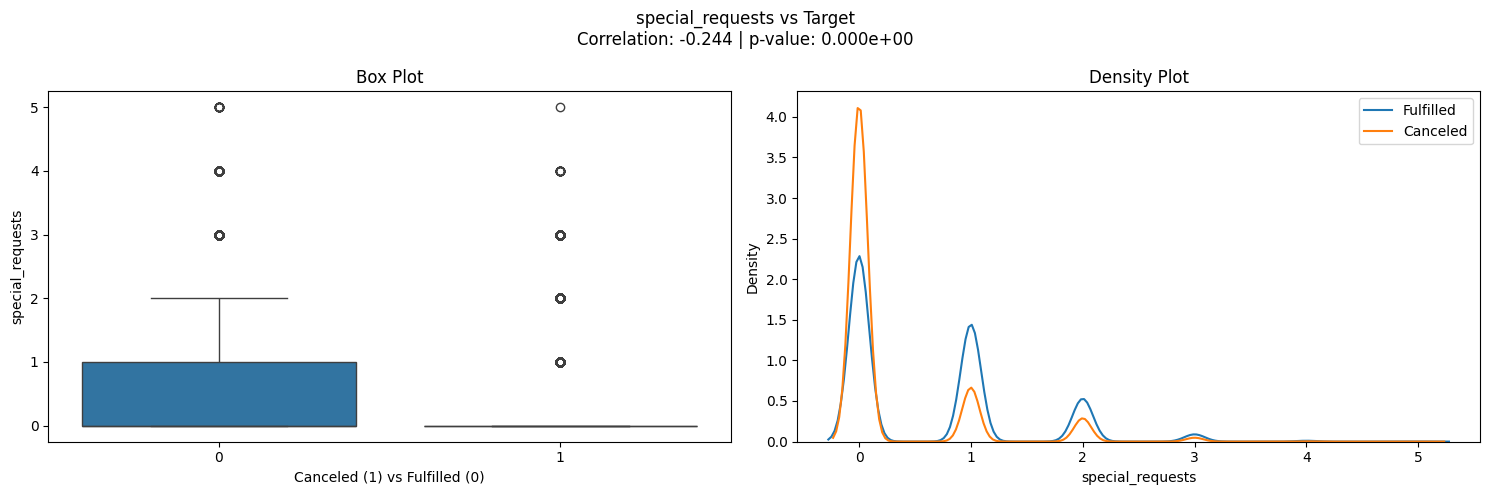

/var/folders/ql/zn80hp1x1xq2fg_1g7n3nn880000gp/T/ipykernel_4269/354252460.py:27: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=subset, ax=ax2, label=f'{"Canceled" if target_val == 1 else "Fulfilled"}')


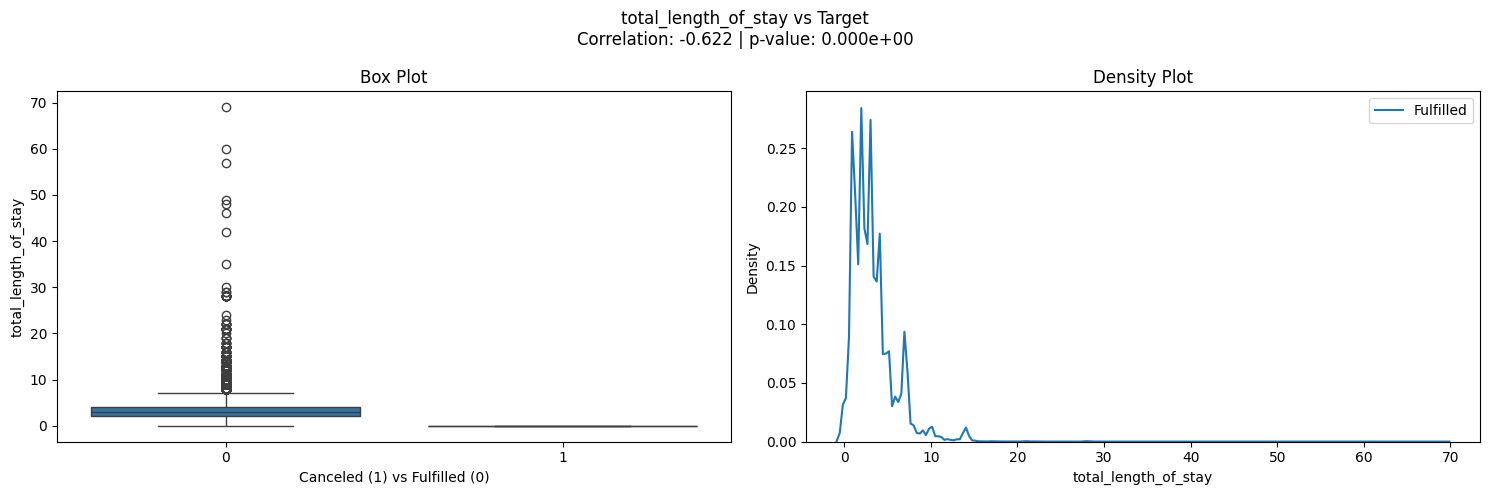

/var/folders/ql/zn80hp1x1xq2fg_1g7n3nn880000gp/T/ipykernel_4269/354252460.py:27: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=subset, ax=ax2, label=f'{"Canceled" if target_val == 1 else "Fulfilled"}')


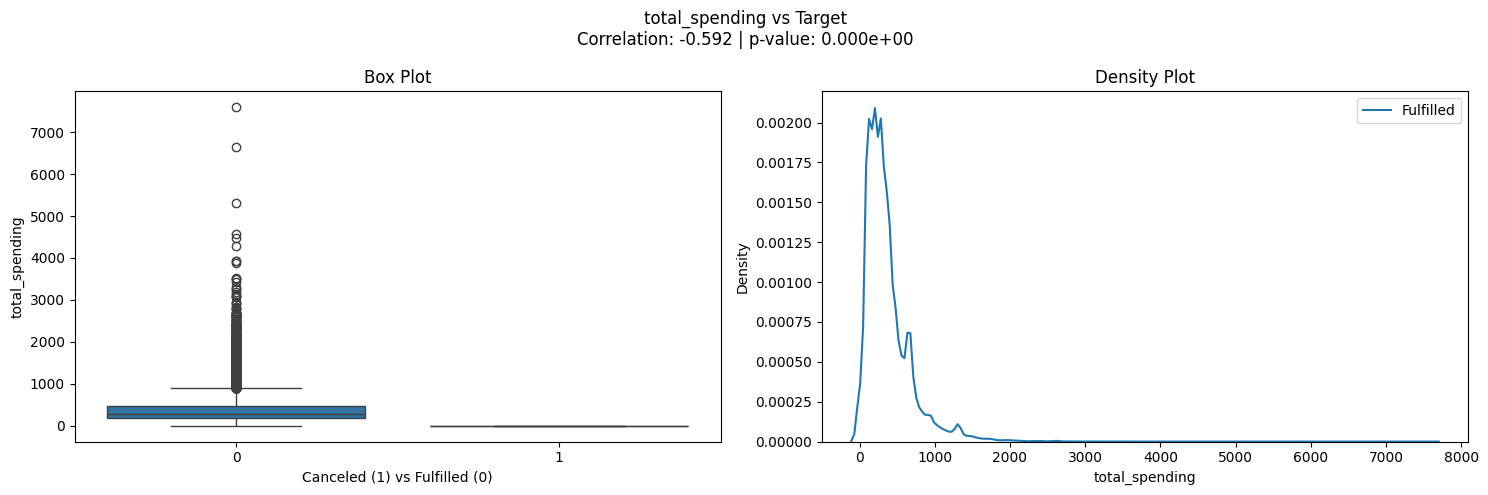

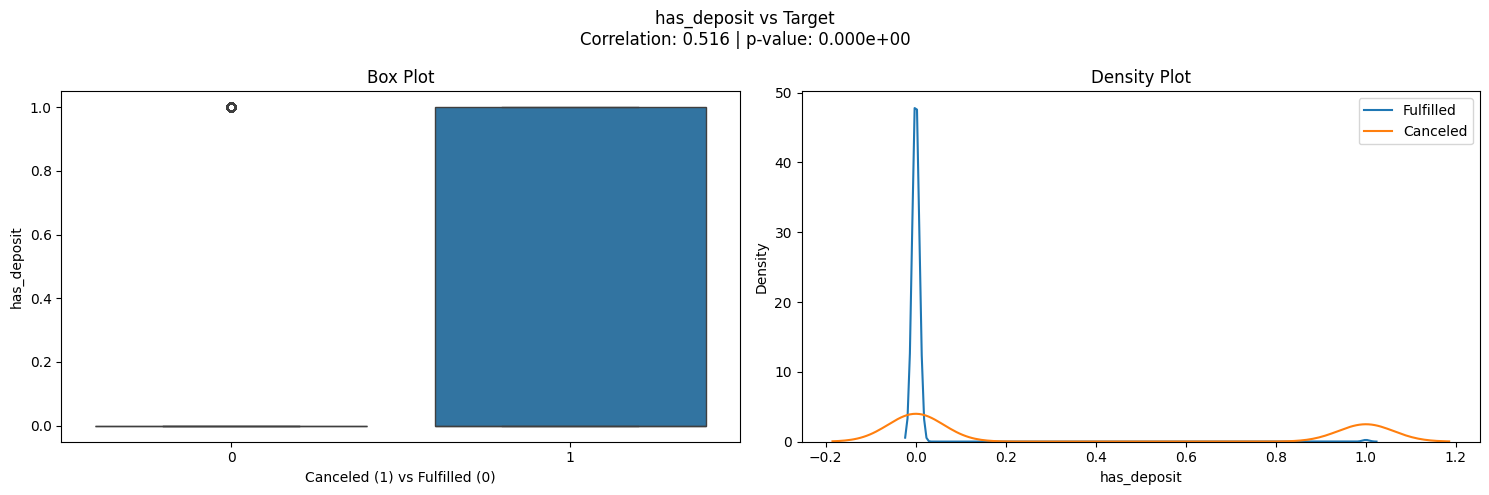

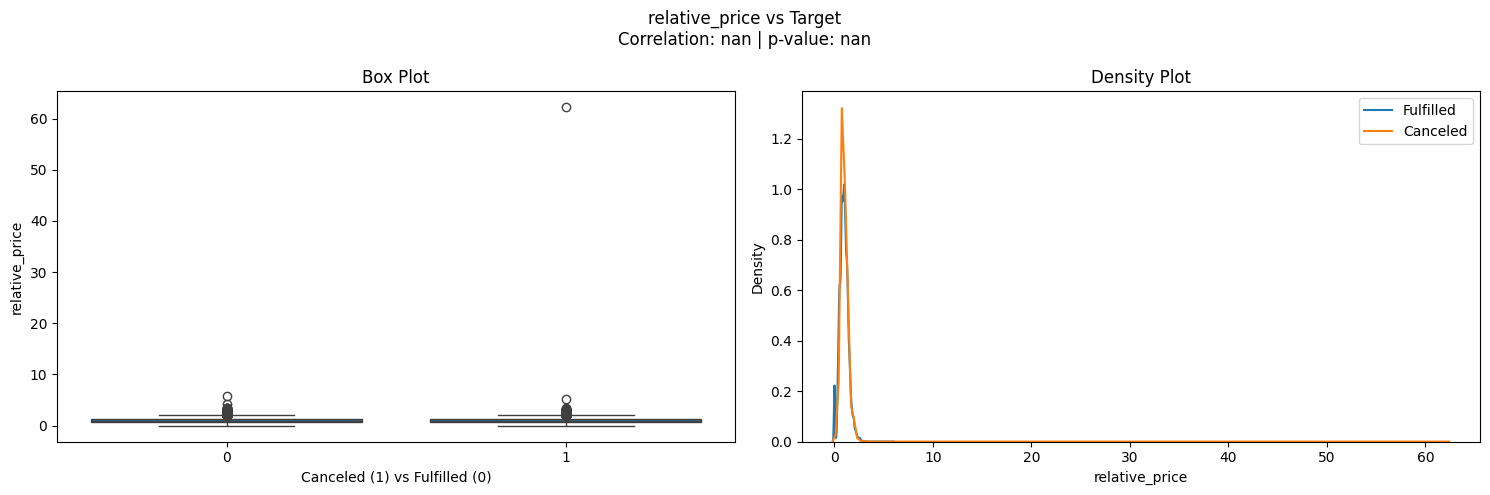

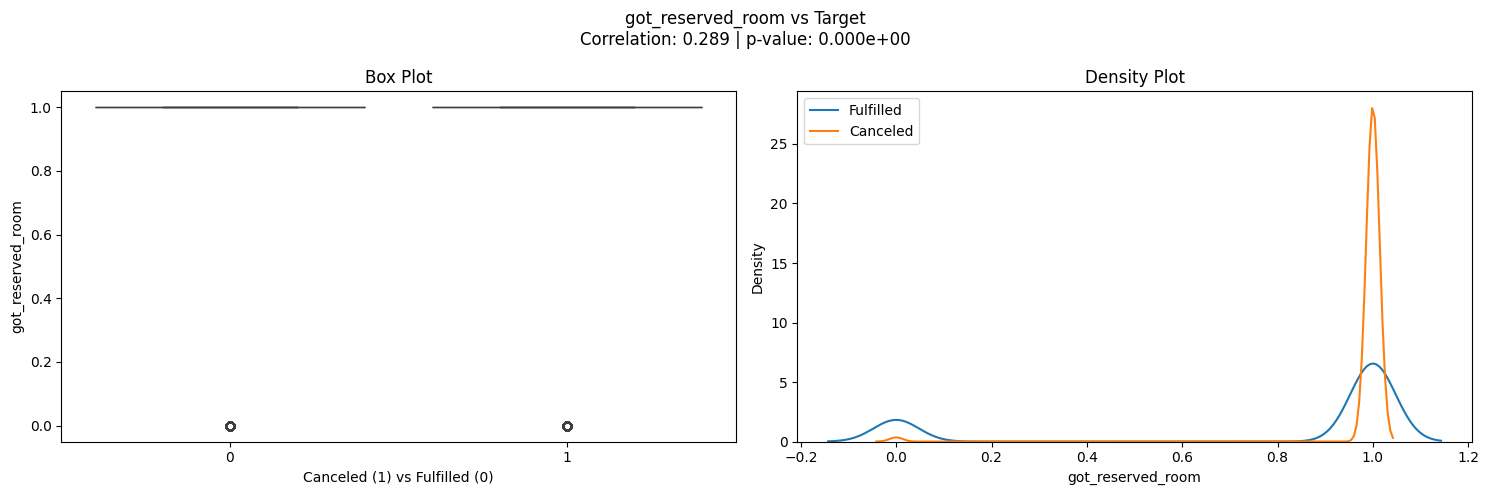

<Figure size 1200x600 with 0 Axes>

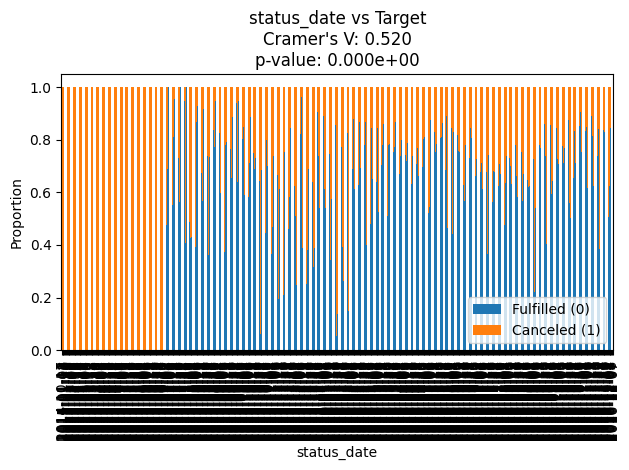

<Figure size 1200x600 with 0 Axes>

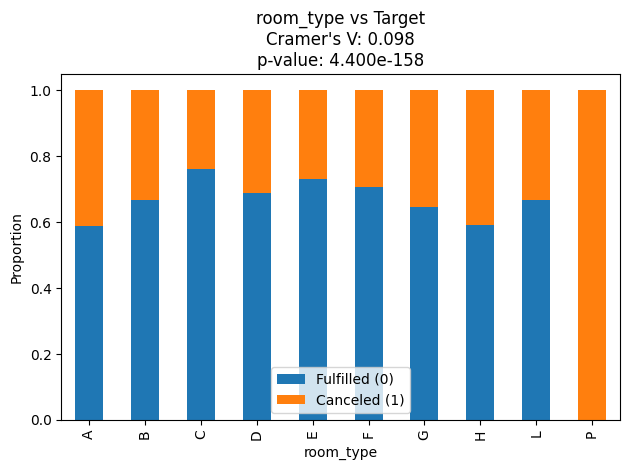

<Figure size 1200x600 with 0 Axes>

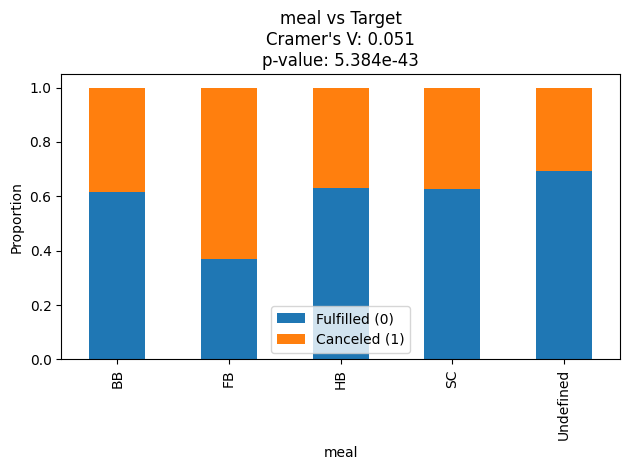

<Figure size 1200x600 with 0 Axes>

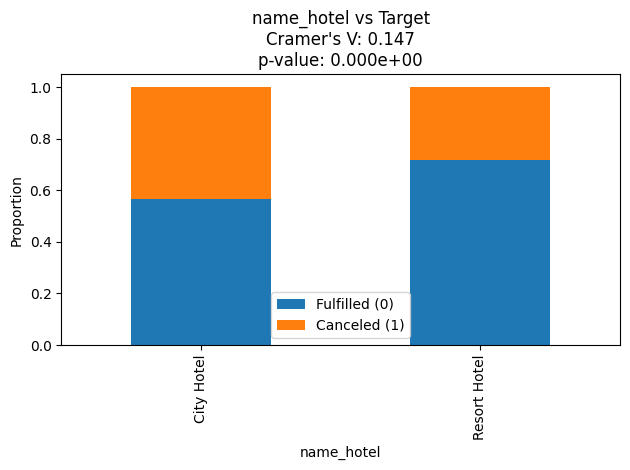

<Figure size 1200x600 with 0 Axes>

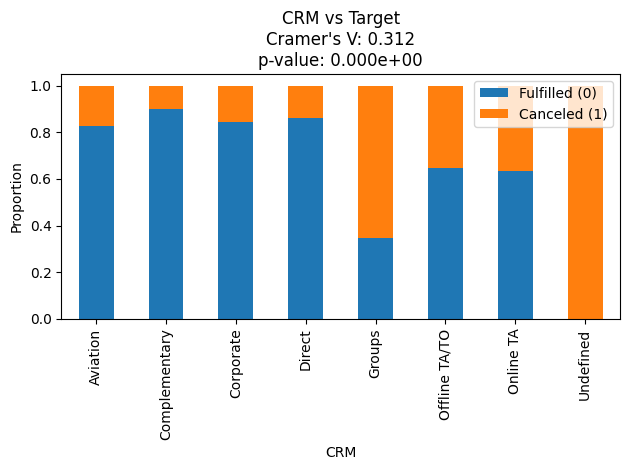

<Figure size 1200x600 with 0 Axes>

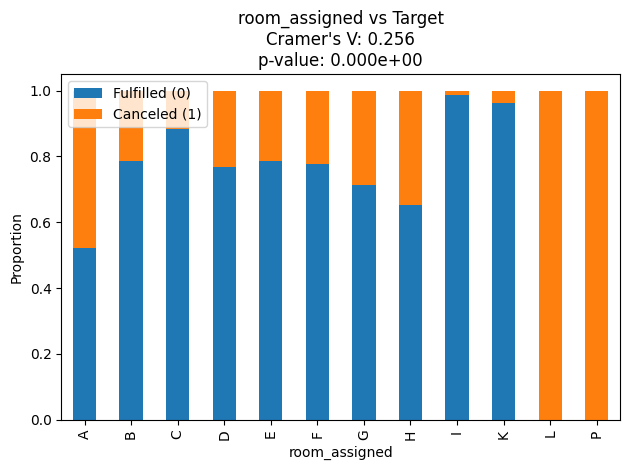

<Figure size 1200x600 with 0 Axes>

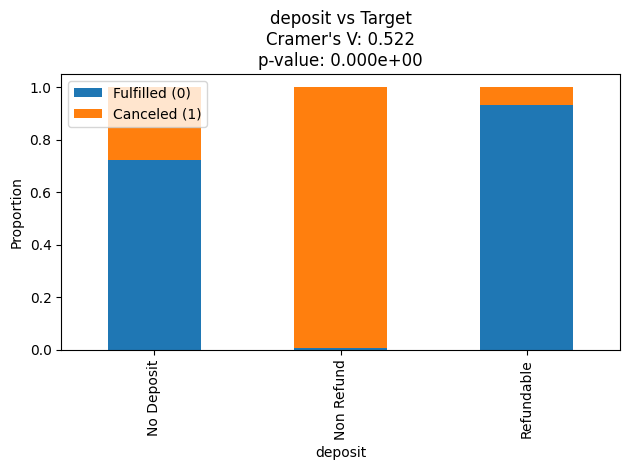

<Figure size 1200x600 with 0 Axes>

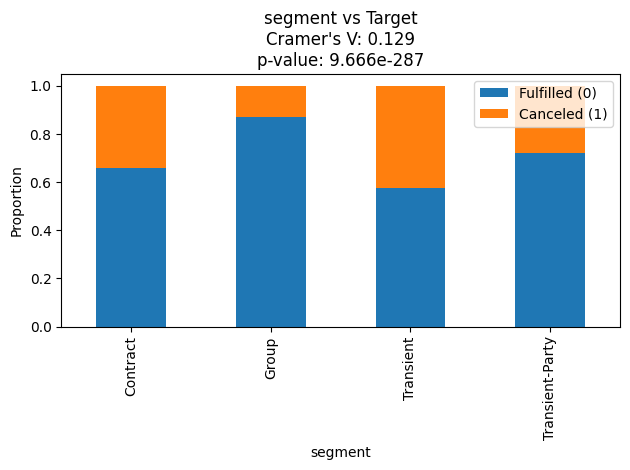

In [164]:
plot_target_relationships(reservations, target_results)

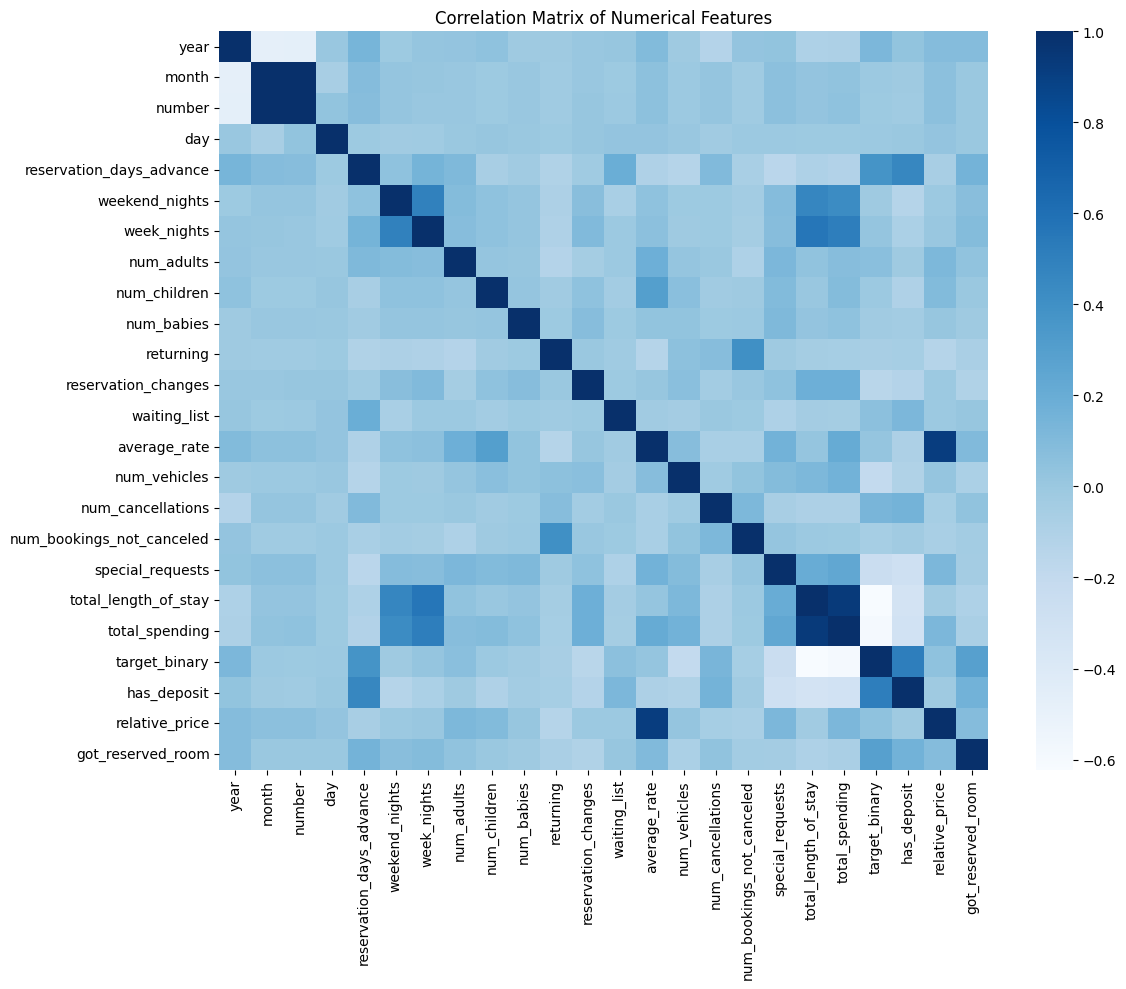


Feature Correlations with Target (Canceled vs. Not Canceled):
target_binary                1.000000
total_length_of_stay        -0.621926
total_spending              -0.591575
has_deposit                  0.516301
reservation_days_advance     0.373514
got_reserved_room            0.288758
special_requests            -0.243556
num_vehicles                -0.203738
reservation_changes         -0.150568
num_cancellations            0.134973
year                         0.121719
returning                   -0.064168
num_adults                   0.062529
waiting_list                 0.062124
num_bookings_not_canceled   -0.055703
relative_price               0.048188
num_babies                  -0.031647
average_rate                 0.021923
week_nights                  0.018313
weekend_nights              -0.015623
number                      -0.009007
num_children                -0.007084
day                         -0.006519
month                       -0.004088
Name: target_binary, dtyp

In [165]:
def create_correlation_matrix(df):
    '''
    correlation matrix, including target variable.
    '''
    df = prepare_target_var(df)
    
    # including target
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    corr_matrix = df[numerical_cols].corr()
    
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, cmap='Blues')
    plt.title('Correlation Matrix of Numerical Features')
    plt.tight_layout()
    plt.show()
    
    # obtain the strongest correlations with target
    target_corr = corr_matrix['target_binary'].sort_values(key=abs, ascending=False)
    print("\nFeature Correlations with Target (Canceled vs. Not Canceled):")
    print(target_corr)
    
    return corr_matrix

corr_matrix = create_correlation_matrix(reservations)

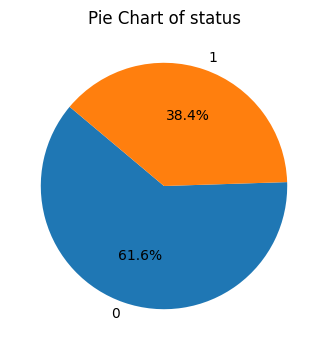

target_binary
0    0.616148
1    0.383852
Name: proportion, dtype: float64
Class 1 (Cancelled): 0.383851870512659
Class 0 (Not-Cancelled): 0.616148129487341


In [166]:
reservations = prepare_target_var(reservations)

value_counts = reservations['target_binary'].value_counts()
plt.figure(figsize = (4, 4))
plt.pie(value_counts, labels = value_counts.index, autopct = '%1.1f%%', startangle = 140)
plt.title(f"Pie Chart of {'status'}")
plt.show()

label_distributions = reservations['target_binary'].value_counts(normalize=True)
print(label_distributions)
print('Class 1 (Cancelled): '+ str(label_distributions[1]))
print('Class 0 (Not-Cancelled): '+ str(label_distributions[0]))

In [167]:
reservations_sorted = reservations.sort_values('reservation_done_date')

#### Sorting the Reservations by `reservation_date`:
- Our logic was that in real-world applications, we would be making predictions about future reservations based on past data.
- Using random splitting, we believe, could lead to some sort of data leakage where we are training future, unrealized bookings to predict ones that already occurred.
- By sorting by booking date, and splitting temporally our aim was to maintain the natural time ordering. 

In [168]:
X_train, X_test, y_train, y_test = train_test_split(reservations.drop(columns=['total_spending', 'status_date','number', 'target_binary', 'status']), reservations['target_binary'], test_size = 0.2, random_state=42)

#ideas for feature engineering
# has_deposit --> turn the deposit_type into binary 
# total_guests --> num_adults + num_children + num_babies
# family_booking --> (num_children + num_babies) > 0 boolean
# time_between --> (status_date - (week_nights+weekend_nights)) - reservation_date




#### Removing `total_spending` and `status_date`
- These features were dropped to prevent data leakage, as they contain information that would not be available at the time of making a prediction:

  - `total_spending` is only known after the stay is completed.
  - `status_date` represents when the final status was recorded, which occurs after the reservation period.
  - Including such features would artificially improve the model's performance during training but would not be useful in real-world applications, as we aim to predict cancellations at the time a reservation is made

In [169]:
#numerical features include continuous or count data
numerical_features = [
    'reservation_days_advance', 'weekend_nights', 'week_nights',
    'num_adults', 'num_children', 'num_babies', 'waiting_list',
    'average_rate', 'num_vehicles', 'num_cancellations',
    'num_bookings_not_canceled', 'special_requests', 'total_length_of_stay', 'total_spending']

#categorical features include discrete non-numeric variables
categorical_features = [
    'room_type', 'meal', 'name_hotel', 'CRM', 'room_assigned', 'deposit', 'segment']

#date-related features
date_features = ['year', 'month', 'day_of_month']

#binary features include variables with 0/1 values
binary_features = ['binary_target']

#preprocessing pipeline for numerical features: impute missing numerical values and standardize with Z score normalization
numerical_transformer = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy = 'median')),
    ('scaler', StandardScaler())])

#preprocessing pipeline for categorical features: impute using most frequent value and convert using one hot encoding
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy = 'most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown = 'ignore'))])

#combine preprocessing steps for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers = [
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)],
    remainder = 'passthrough')

In [170]:
X_train_scaled = preprocessor.fit_transform(X_train)





ValueError: A given column is not a column of the dataframe

- To ensure that the high score that you have obtained is not due to overfitting, it is important to evaluate your model on a validation set.
- 